# Cyfrowe Przetwarzanie Sygnałów

**Laboratorium nr 3 Analiza częstotliwościowa - podstawy**

prof. dr hab. inż. Tomasz Zieliński, dr inż. Jarosław Bułat 

rozwiązania: Artur Strózik

##**1. DFT sygnału harmonicznego (1 pkt)**
Wyznacz macierz A transformacji DFT: 
  
> $A(k,n)=\frac{1}{\sqrt{N}}\mathrm{W_{N}}^{-kn},$ gdzie $W_{N}=\mathrm{e}^{j\frac{2\pi}{N}},$ $k,n=0,...,N−1$ to wiersze i kolumny macierzy $A$

dla *N=100* i oblicz DFT $(X=Ax)$ następującego sygnału $x$:

> $x(t)=A_1\cos(2\pi f_1 t + \phi_1) + A_2\cos(2\pi f_2 t + \phi_2)$

spróbkowanego z częstotliwością *fs=1000* Hz, mającego *N=100* próbek i będącego sumą dwóch kosinusoid,  o częstotliwościach *f1=100* Hz i *f2=200* Hz, amplitudach *A1=100* i *A2=200* oraz kątach fazowych $φ_{1}=\frac{\pi}{7}$ i $φ_{2}=\frac{\pi}{11}$.

Narysuj widmo $x$ (część rzeczywista, urojona, moduł, faza), wyskaluj oś częstotliwości w hercach. Zauważ, że część rzeczywista współczynnika widmowego mówi ile w sygnale jest kosinusa o danej częstotliwości, a część urojona – ile sinusa (do składowych sygnału zastosuj wzór na kosinusa sumy kątów: *cos(a+b)=cos(a)cos(b)-sin(a)sin(b)*). Zauważ, że część rzeczywista jest symetryczna (to samo) względem częstotliwości *fs/2* (próbka *N/2+1*), a część urojona – asymetryczna (wartość zanegowana).

Wyznacz macierz rekonstrukcji $B$ jako wynik sprzężenia zespolonego i transpozycji macierzy $A$ (`B=A'`). Zrekonstruuj sygnał na podstawie $X (x_{r}=BX)$ i porównaj go z oryginałem $x (x_{r}==x \ ?)$. Zastąp operację `X=Ax` poprzez `X=fft(x)`, zaś `xr=BX` – przez `xr=ifft(X)`. Czy $x$ i $x_{r}$ są takie same jak poprzednio? O ile wartości nowego $X$ są różne od poprzednich i czy jest to związane z wartością *N*? Zmień *f1=100* Hz na *f1=125* Hz, oblicz i wyświetl widmo jak poprzednio. 




---
> $^{1}$ Konwencja zapisu transformaty Fouriera jest taka, że jej wynik (wektor $X$) jest zapisywany dużą literą, natomiast wektor wejściowy $x$ jest pisany małą literą. Jest to trochę mylące, poniważ $X$ sugeruje macierz, a w tym kontekście jest wektorem o rozmiarze takim samym jak $x$.



Zrekonstruowano sygnał x do xr z błędem: 7.878863357291329e-06
Zrekonstruowano sygnał metodami fft/ifft z błędem: 8.540020264605375e-14


Text(0, 0.5, 'Kąt [rad]')

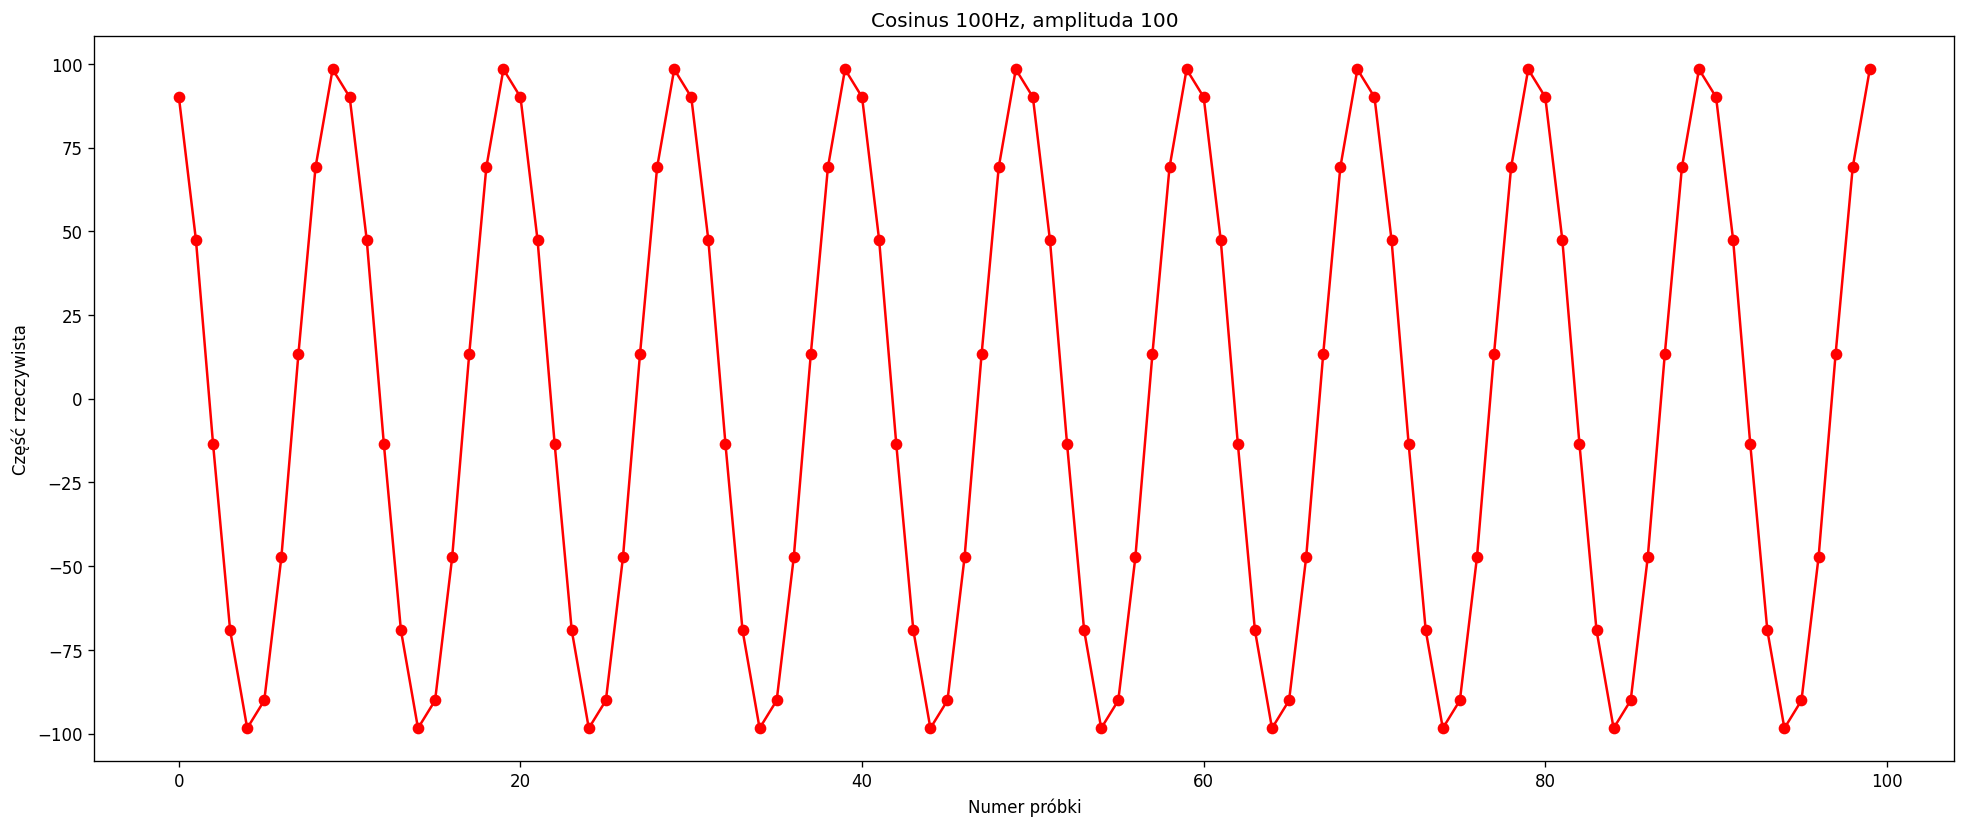

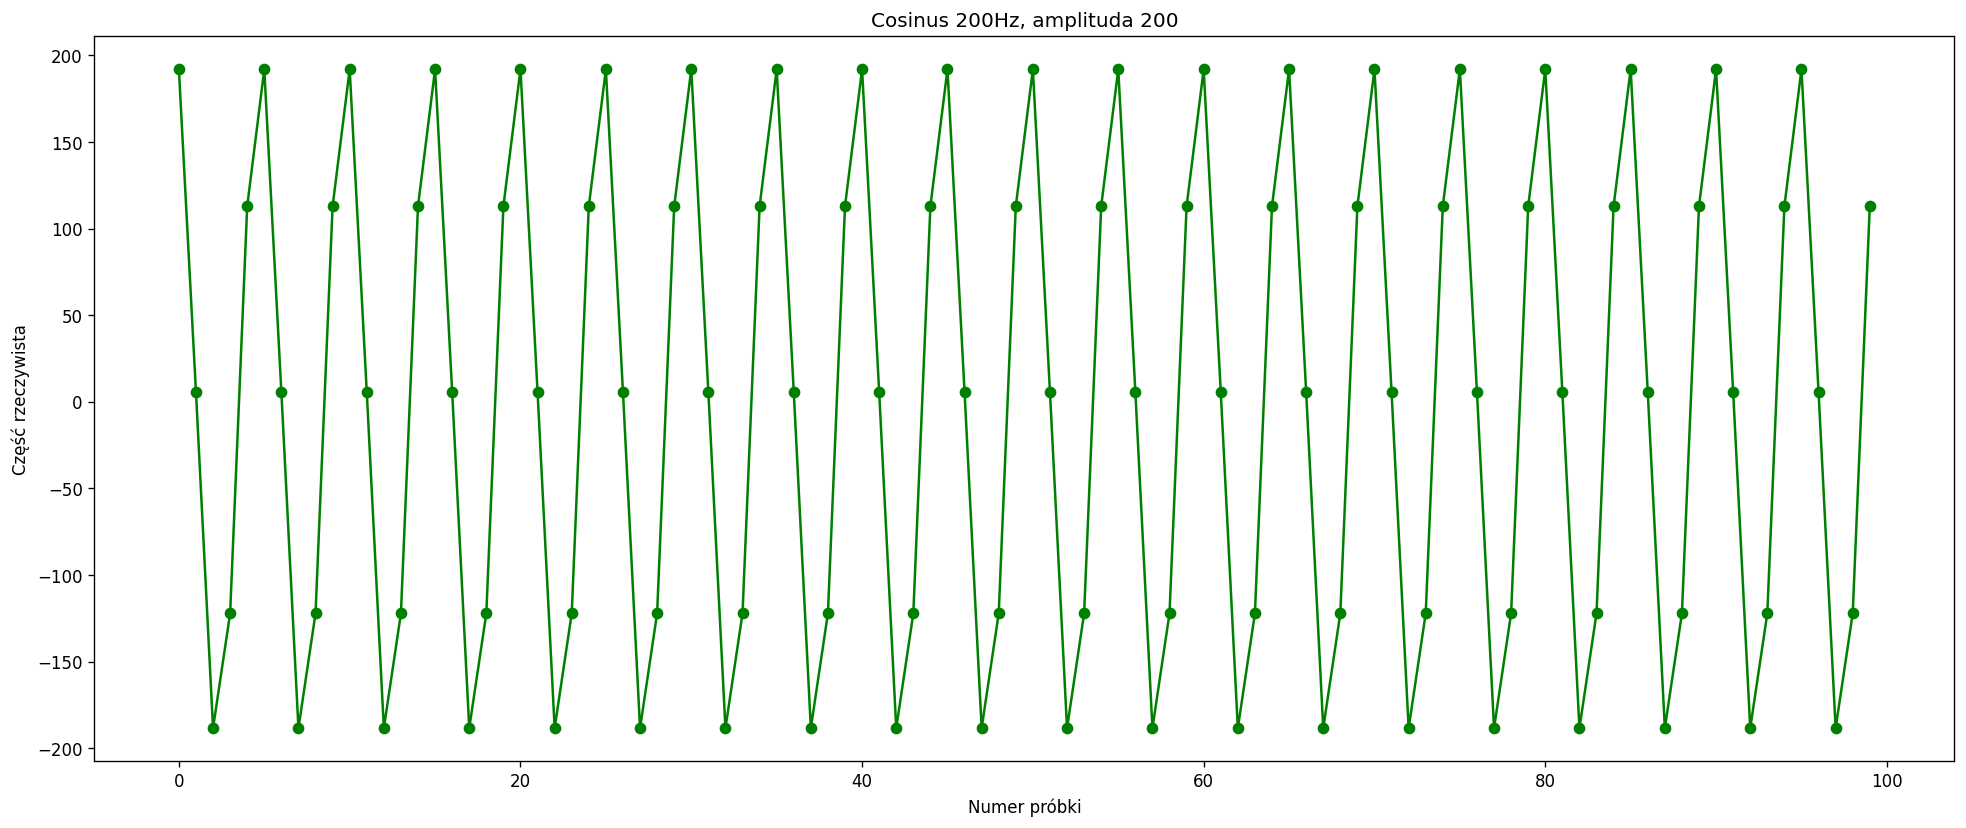

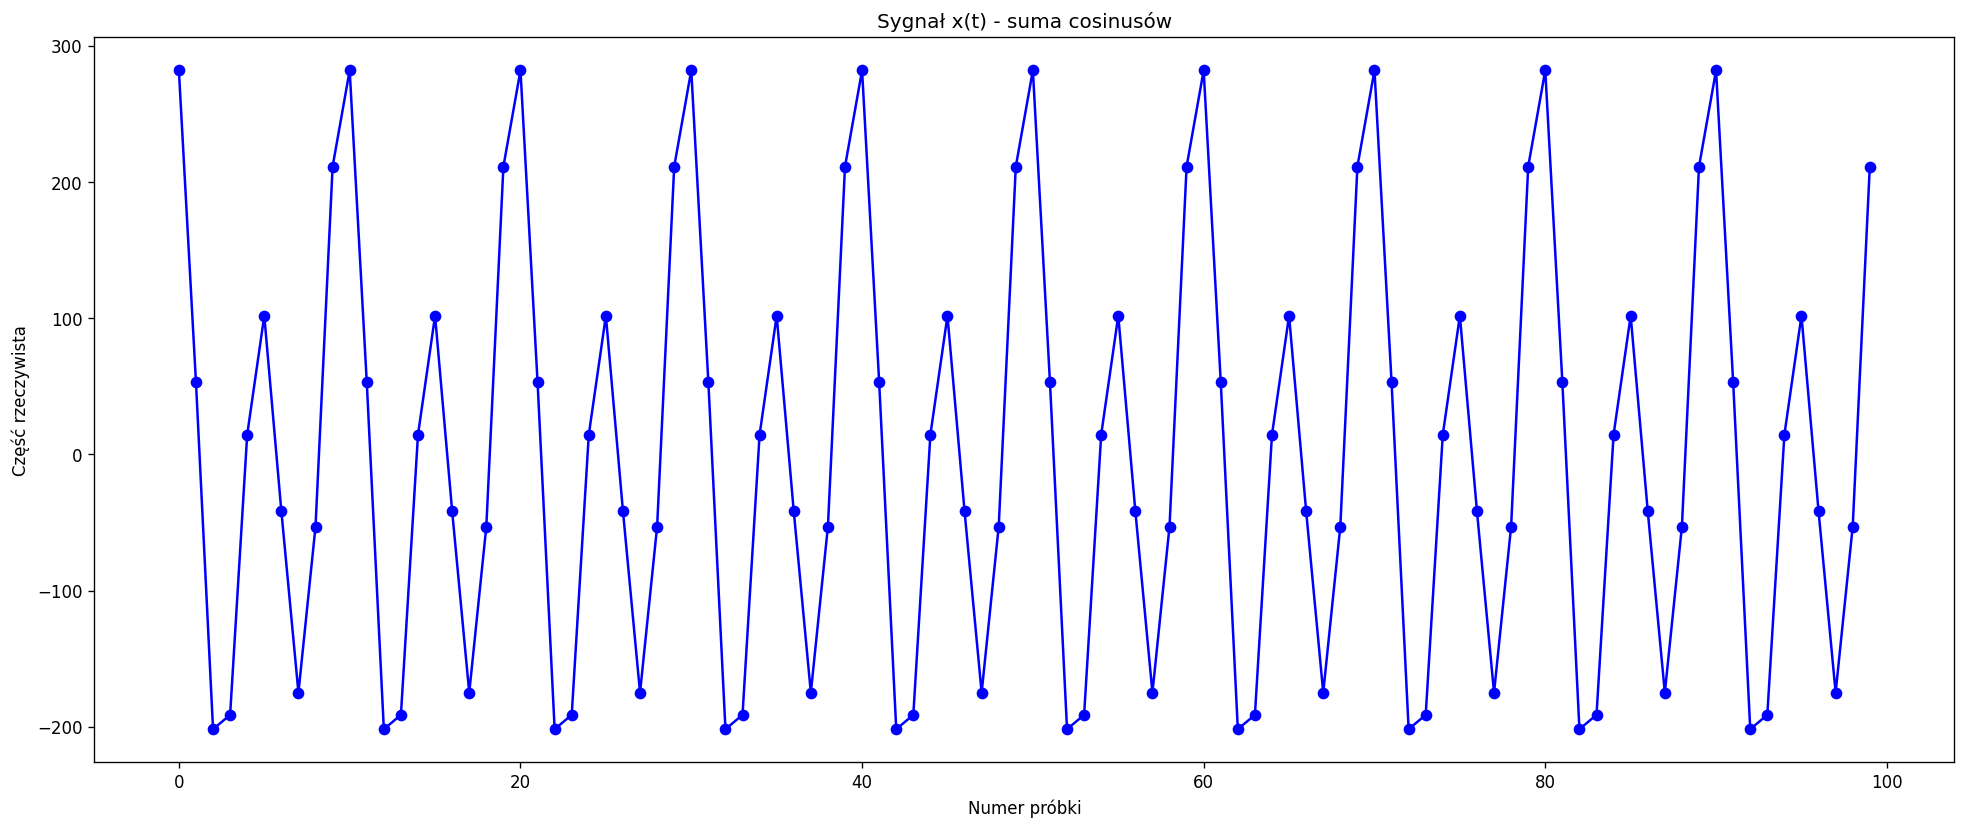

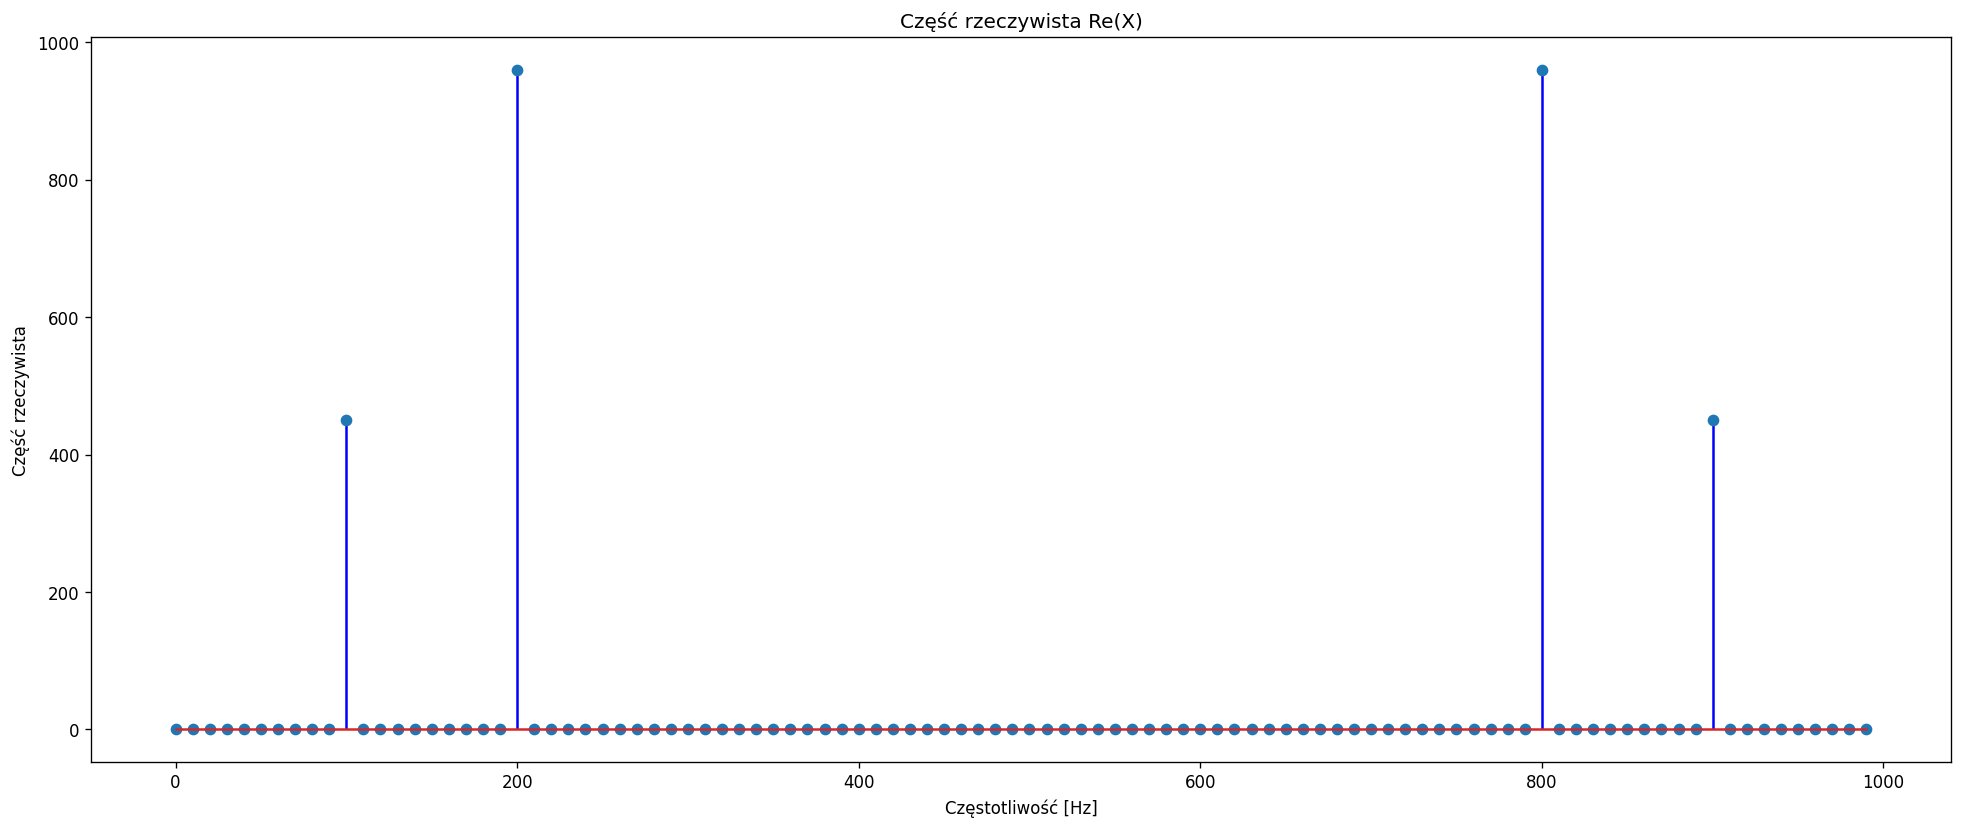

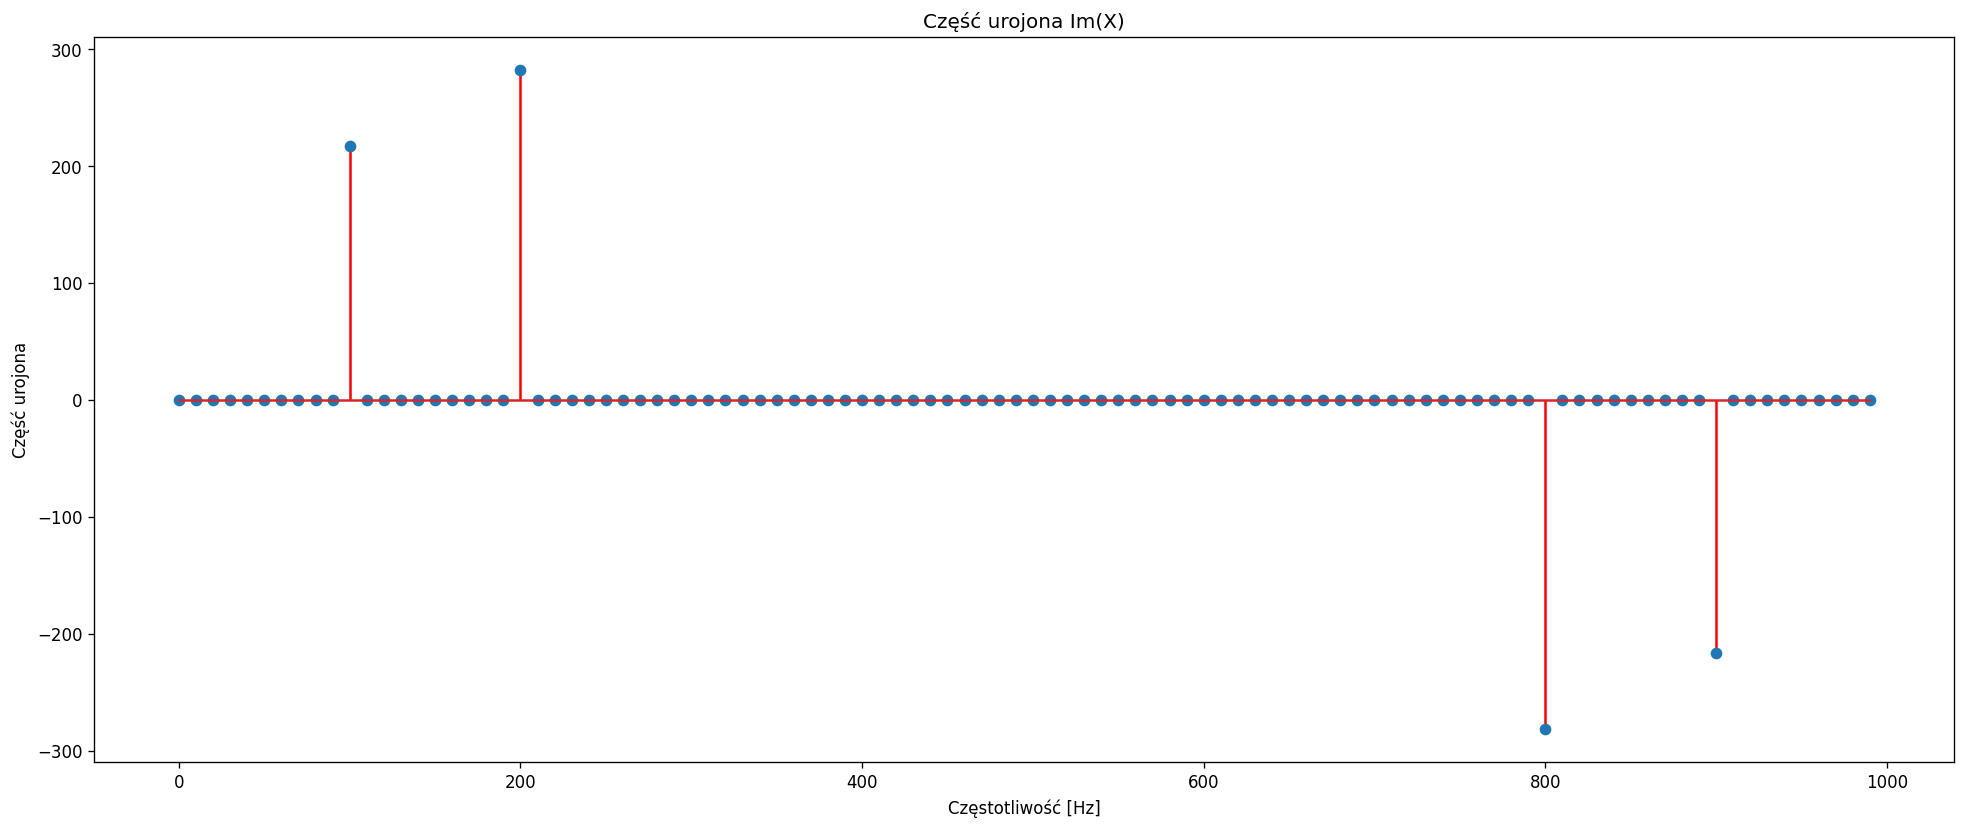

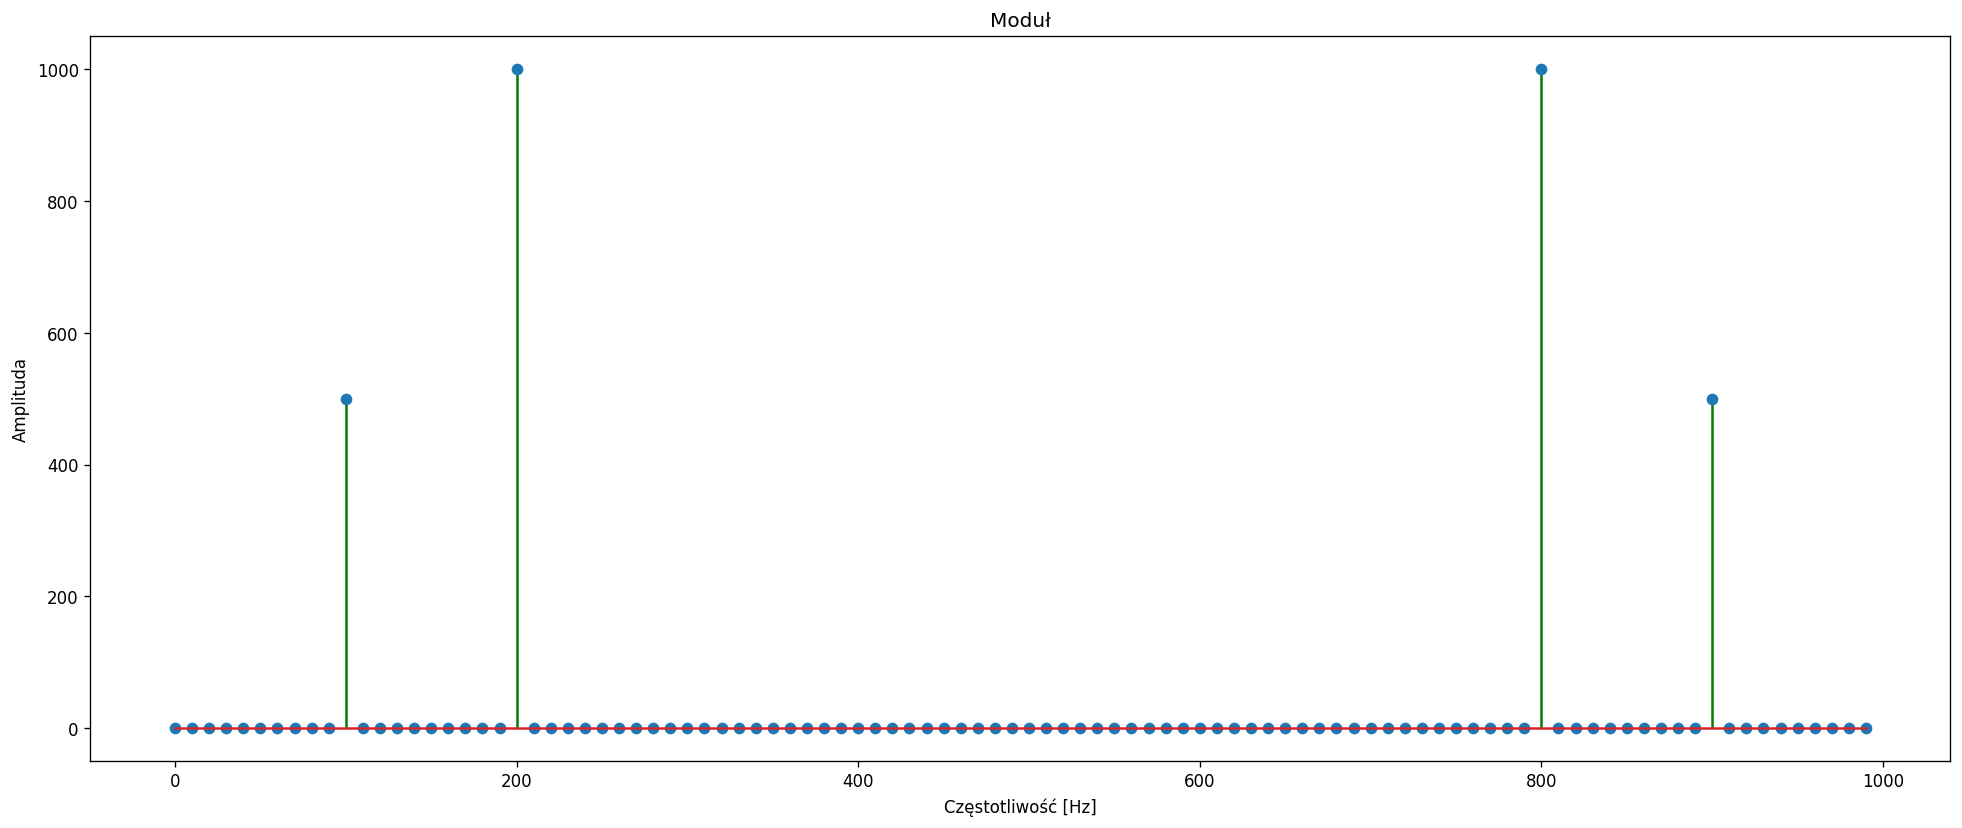

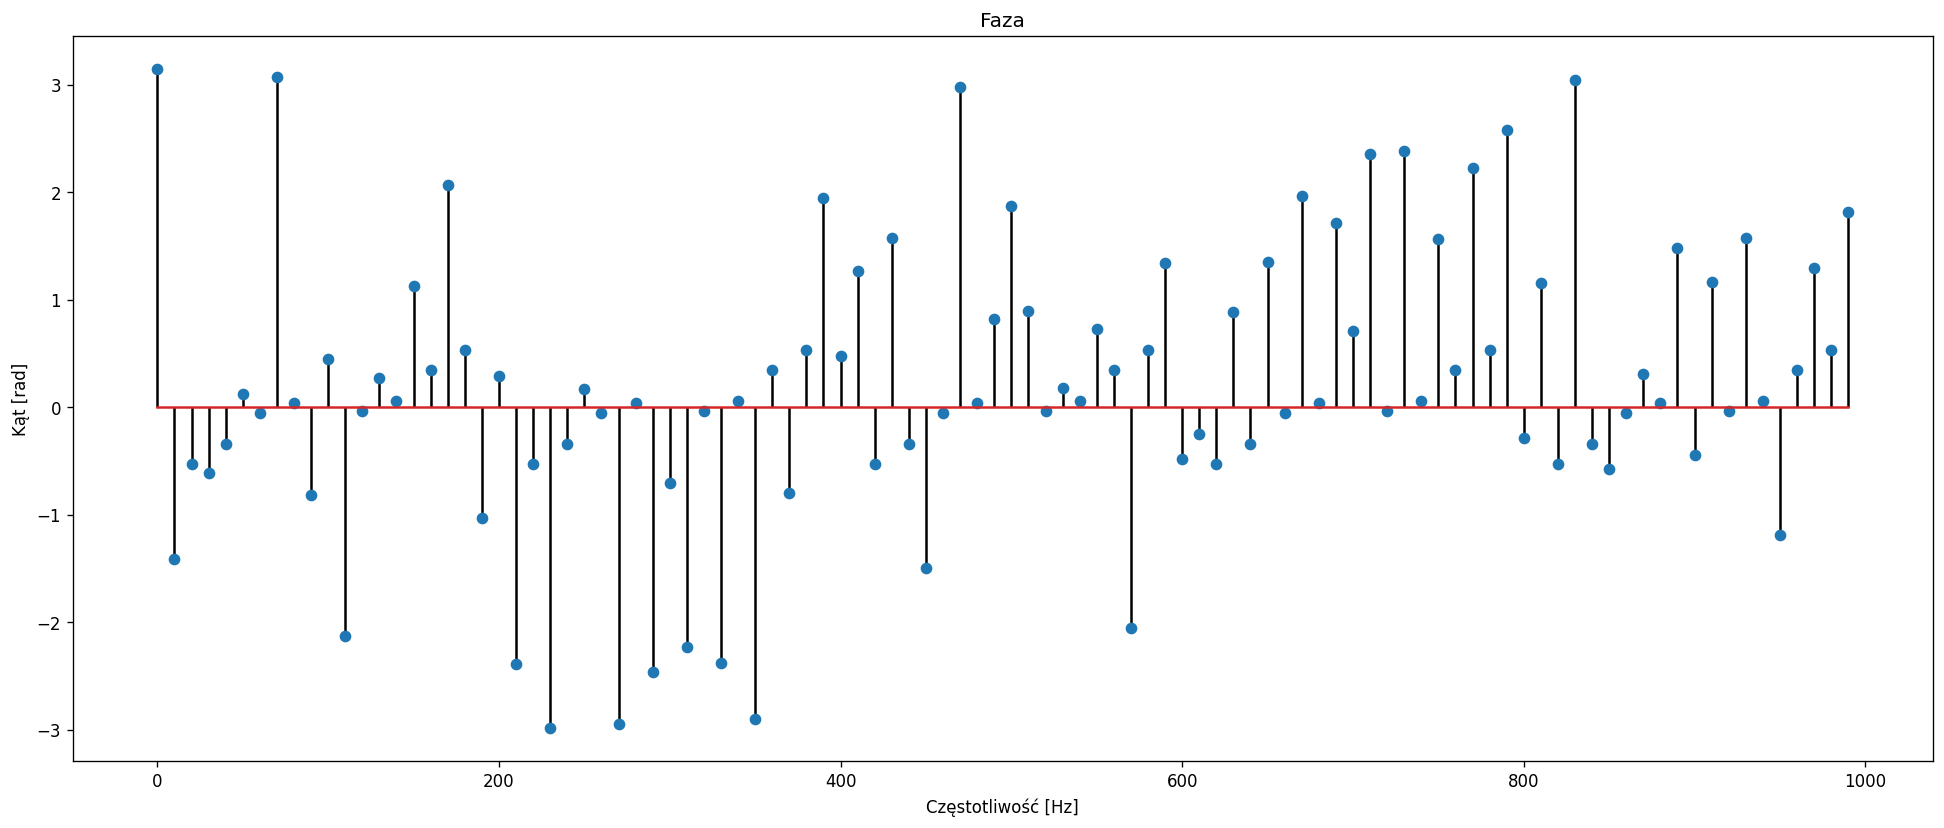

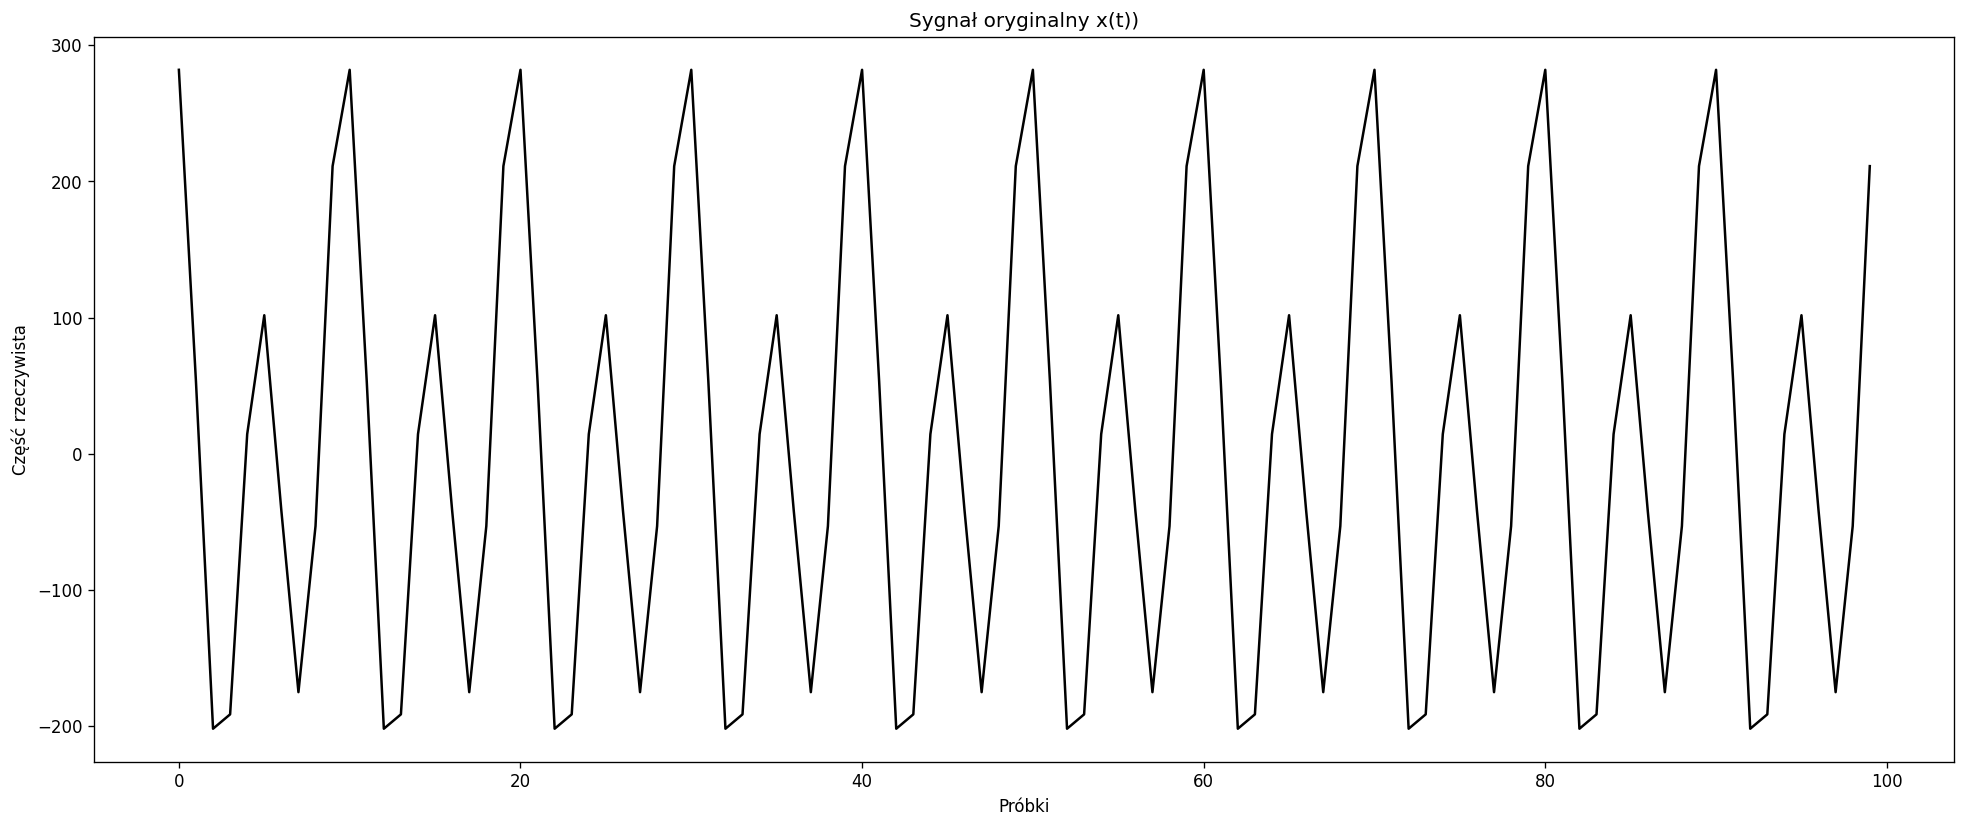

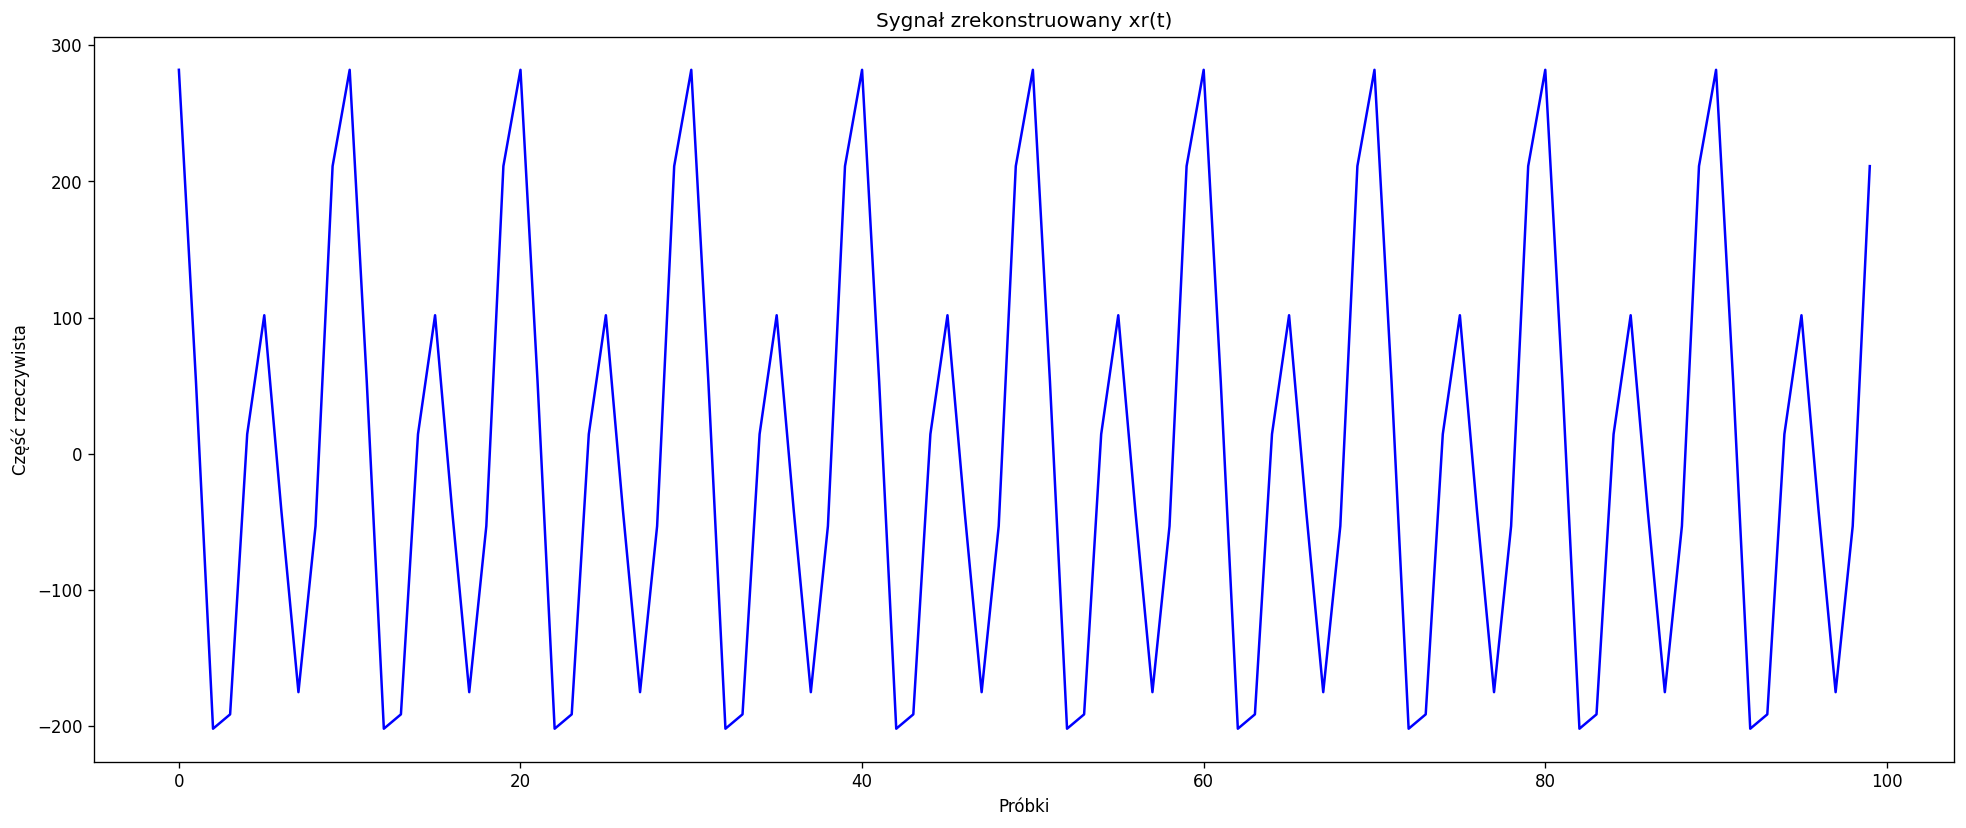

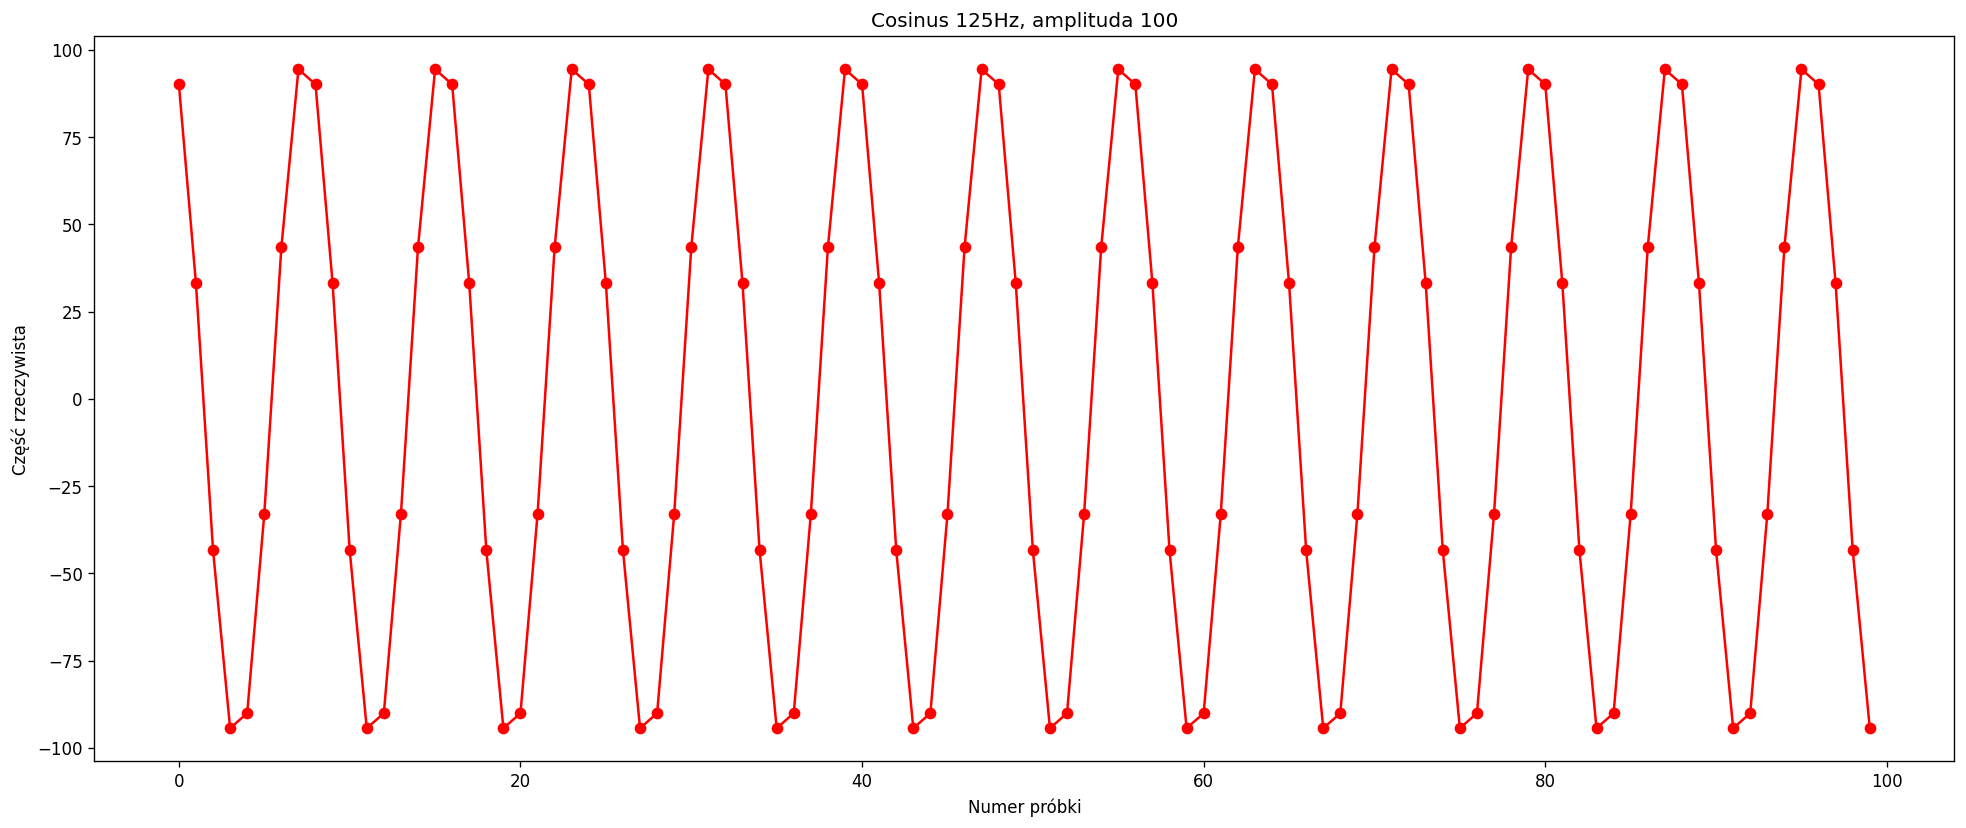

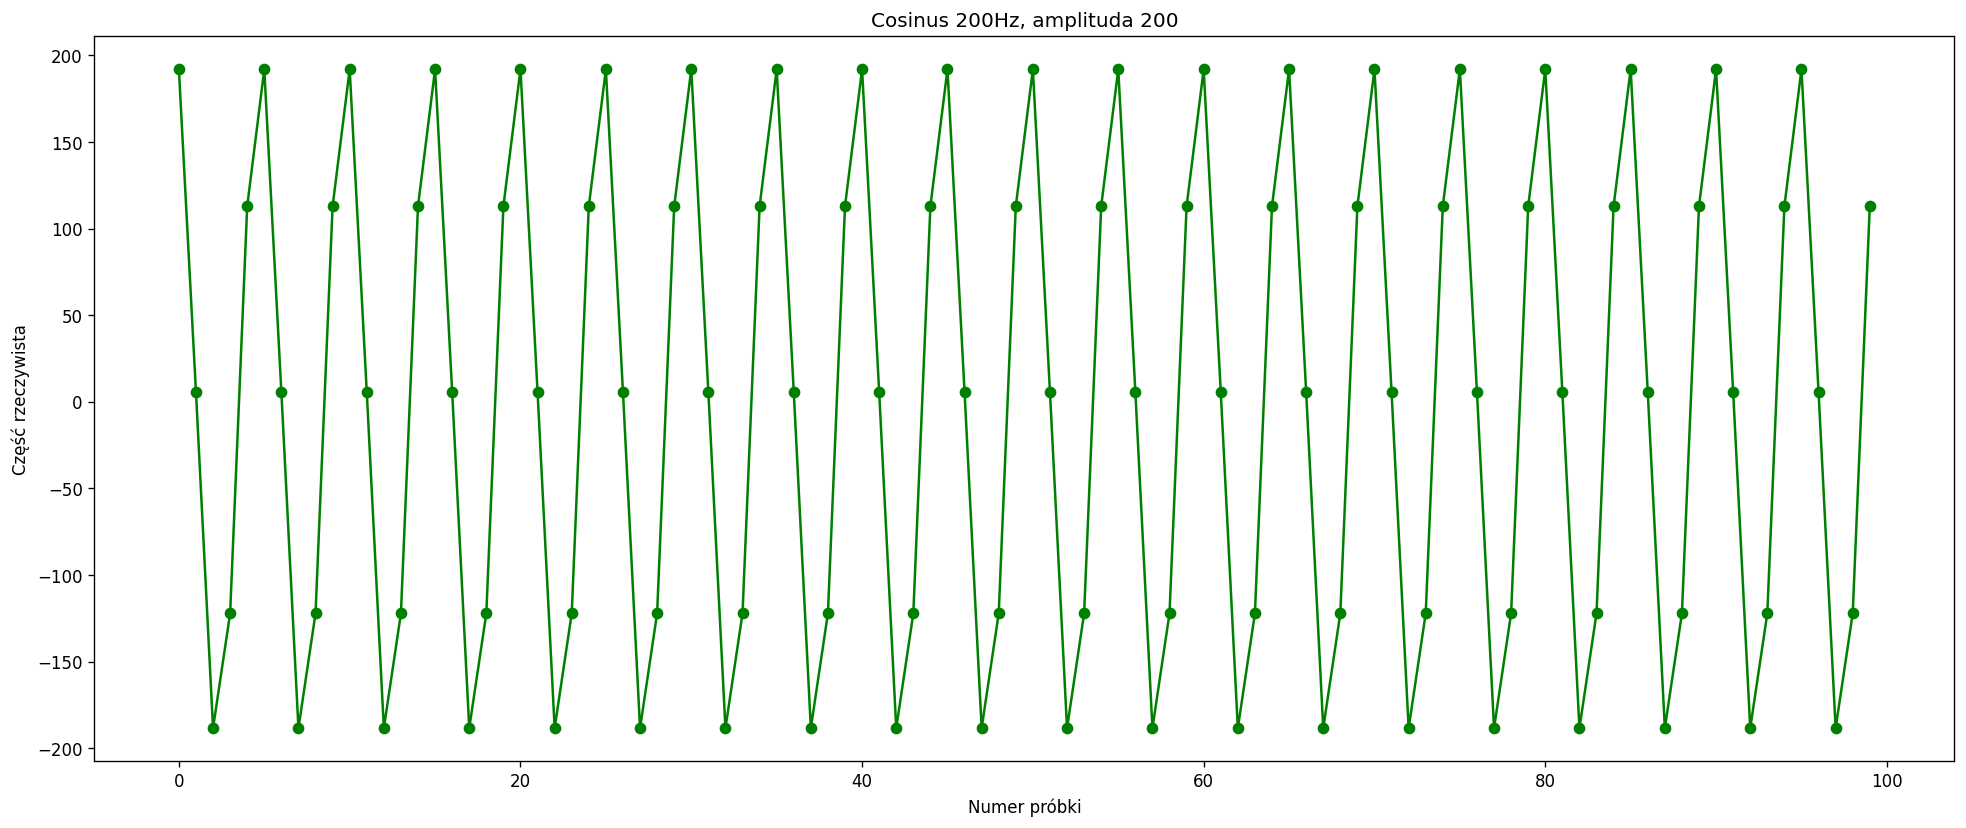

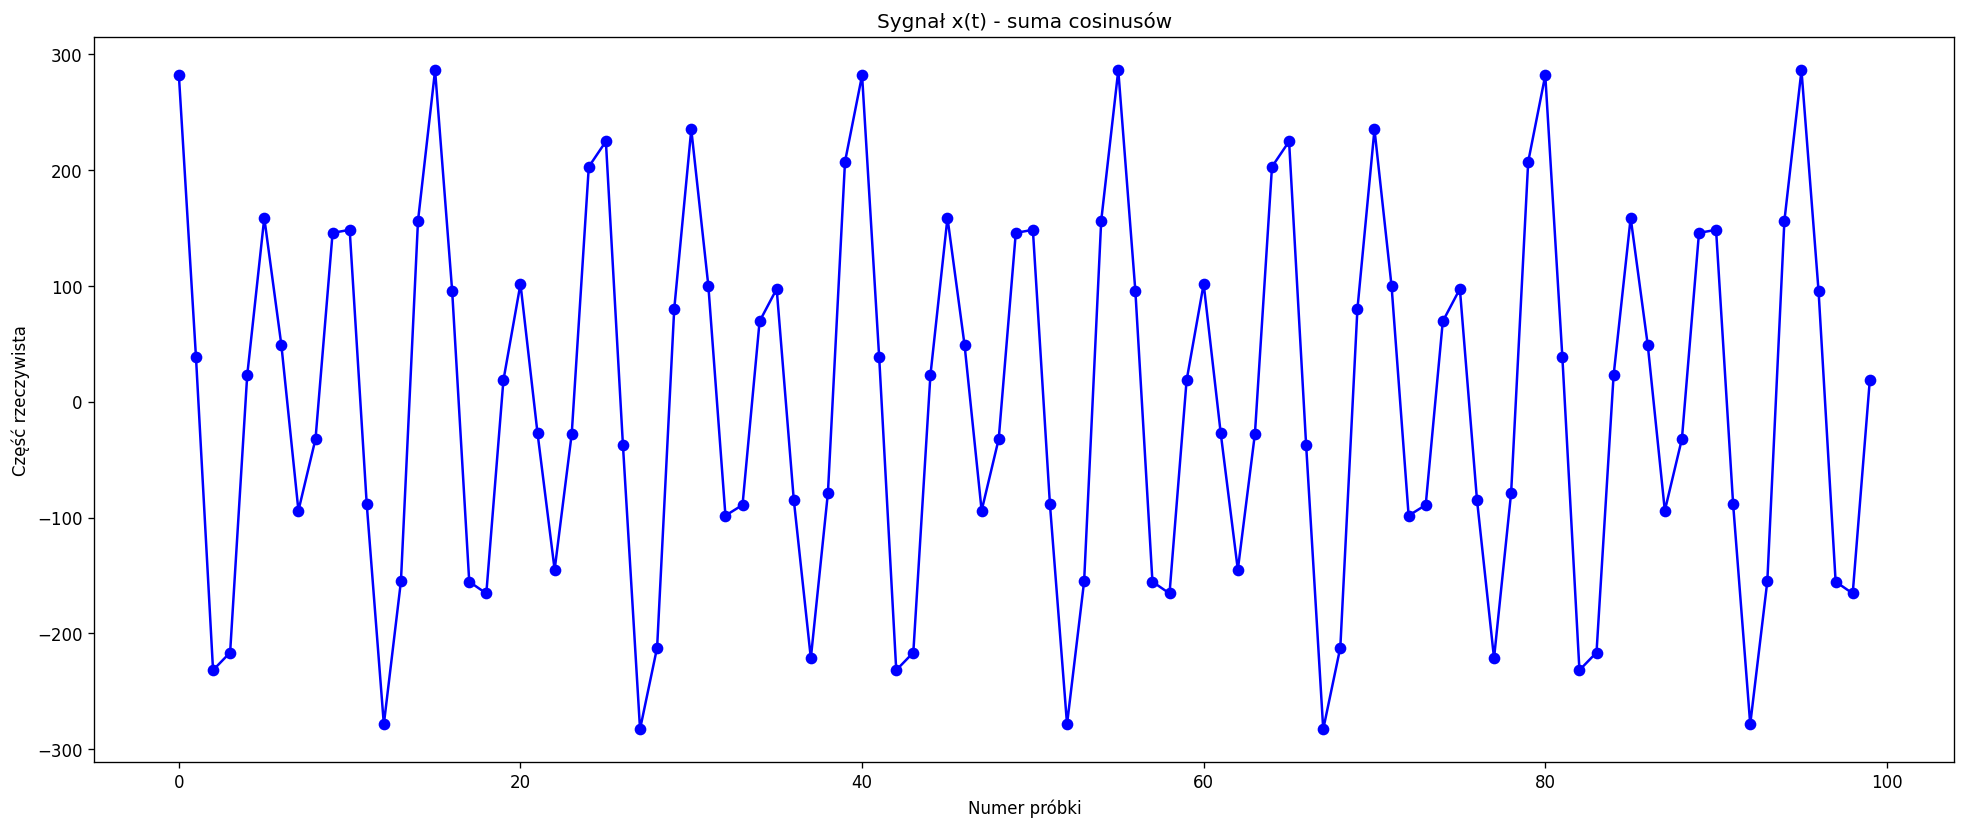

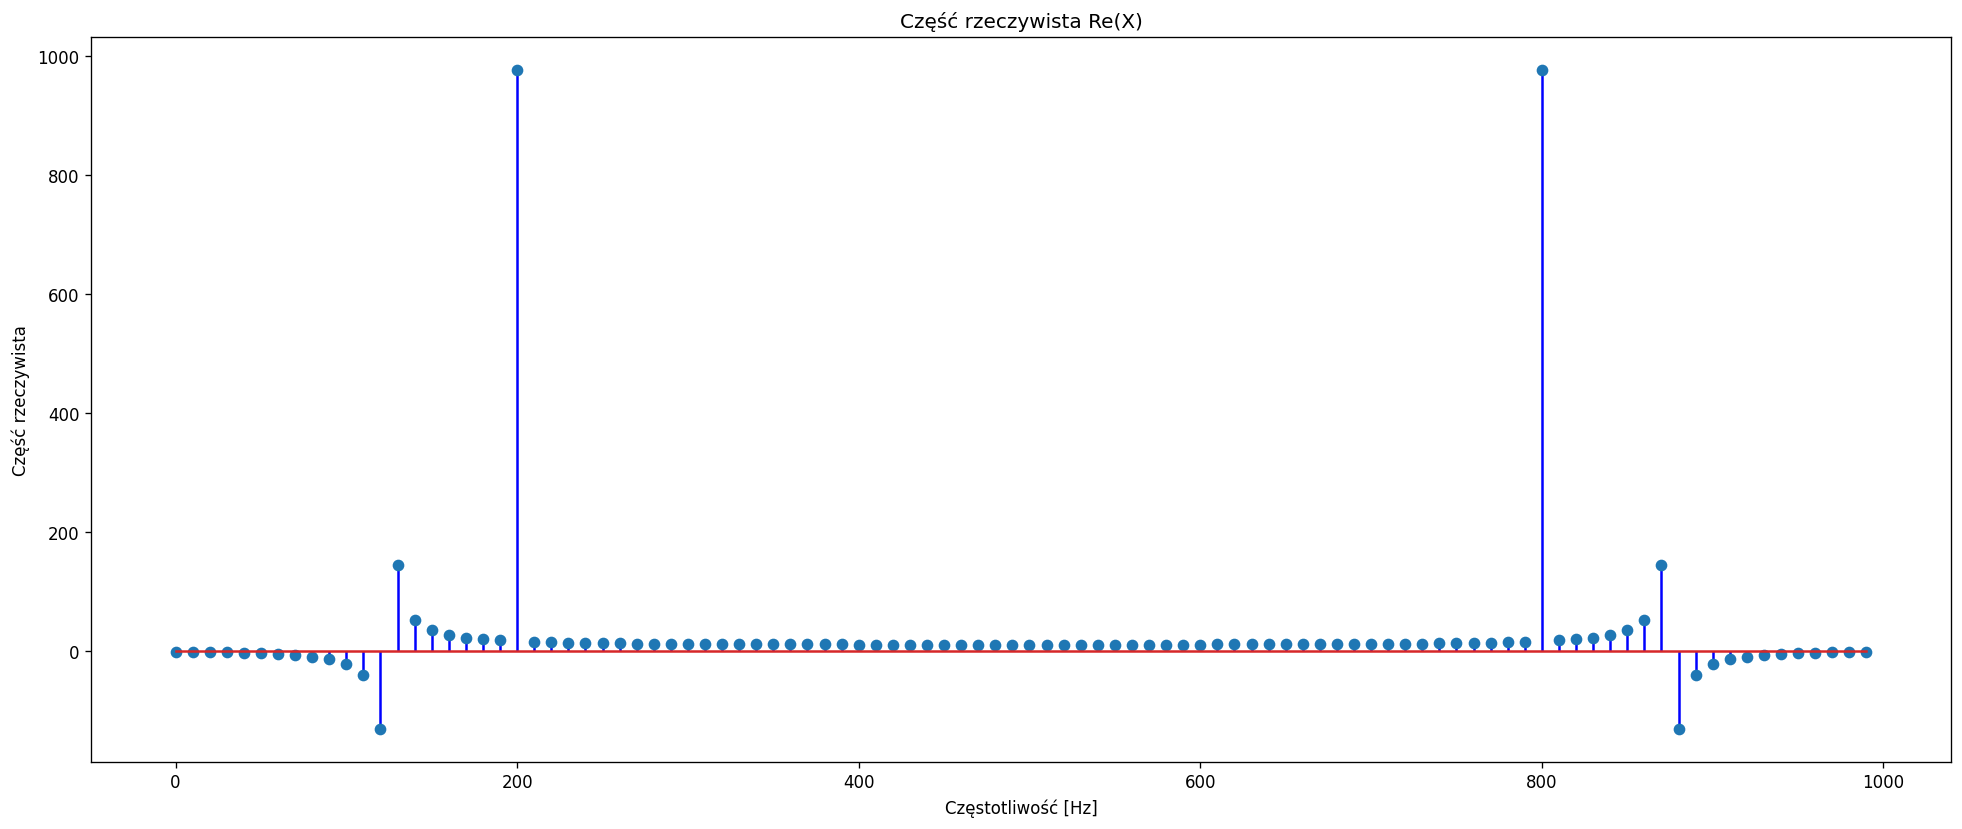

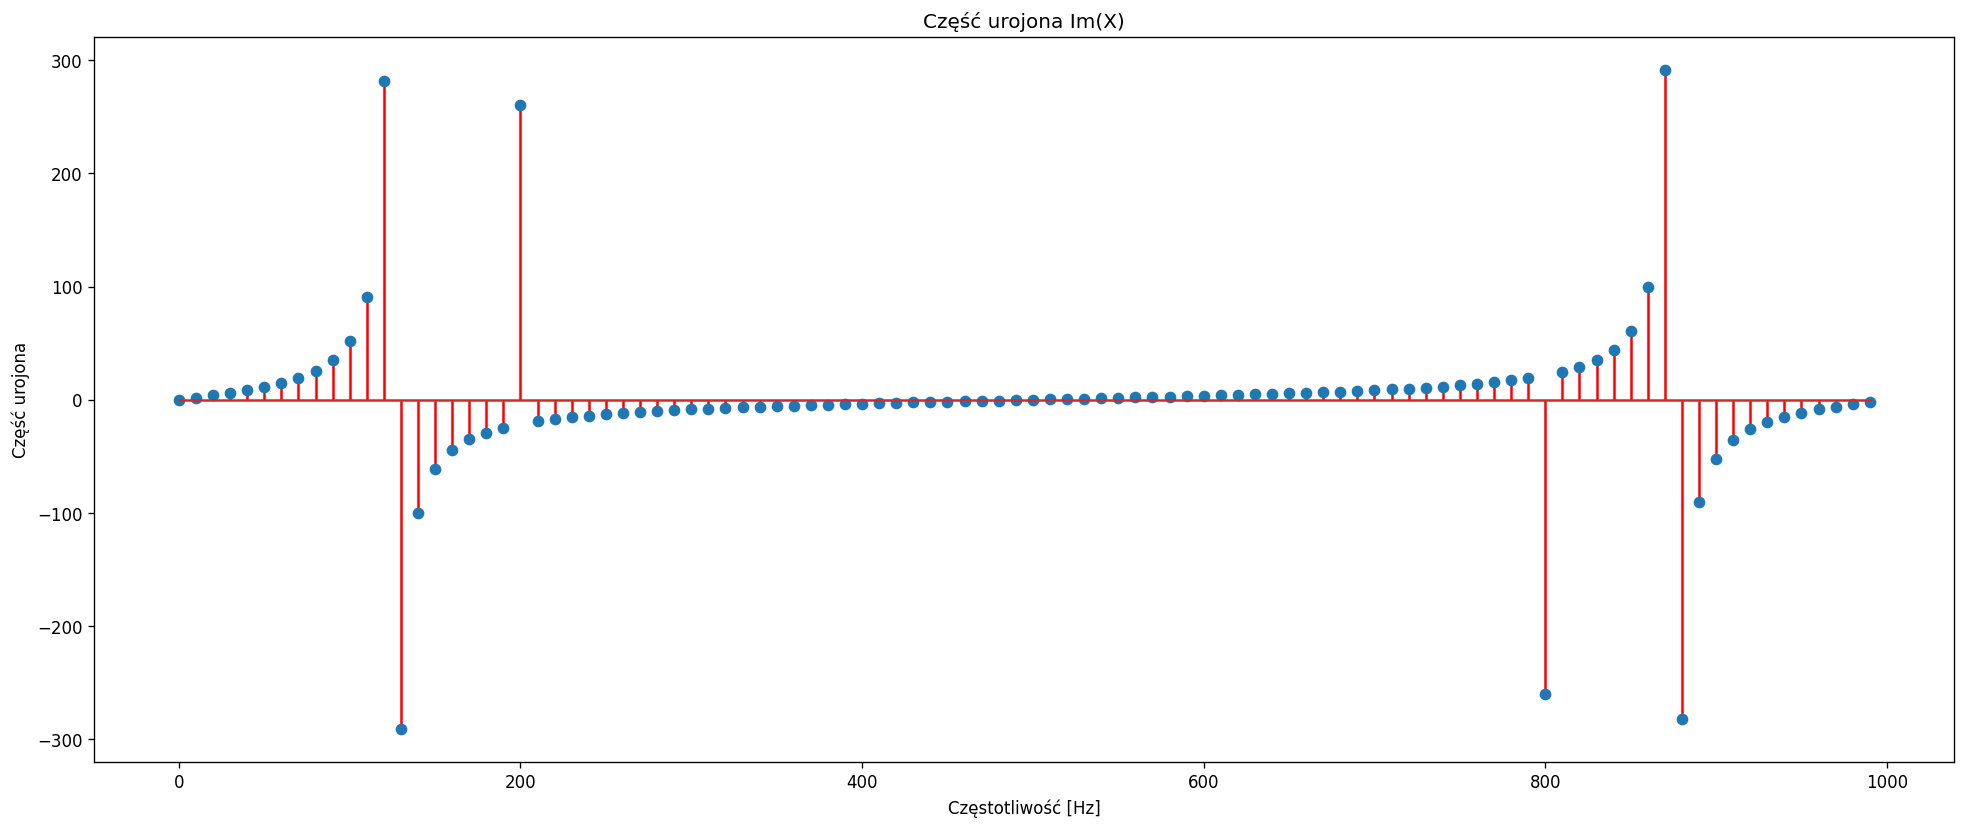

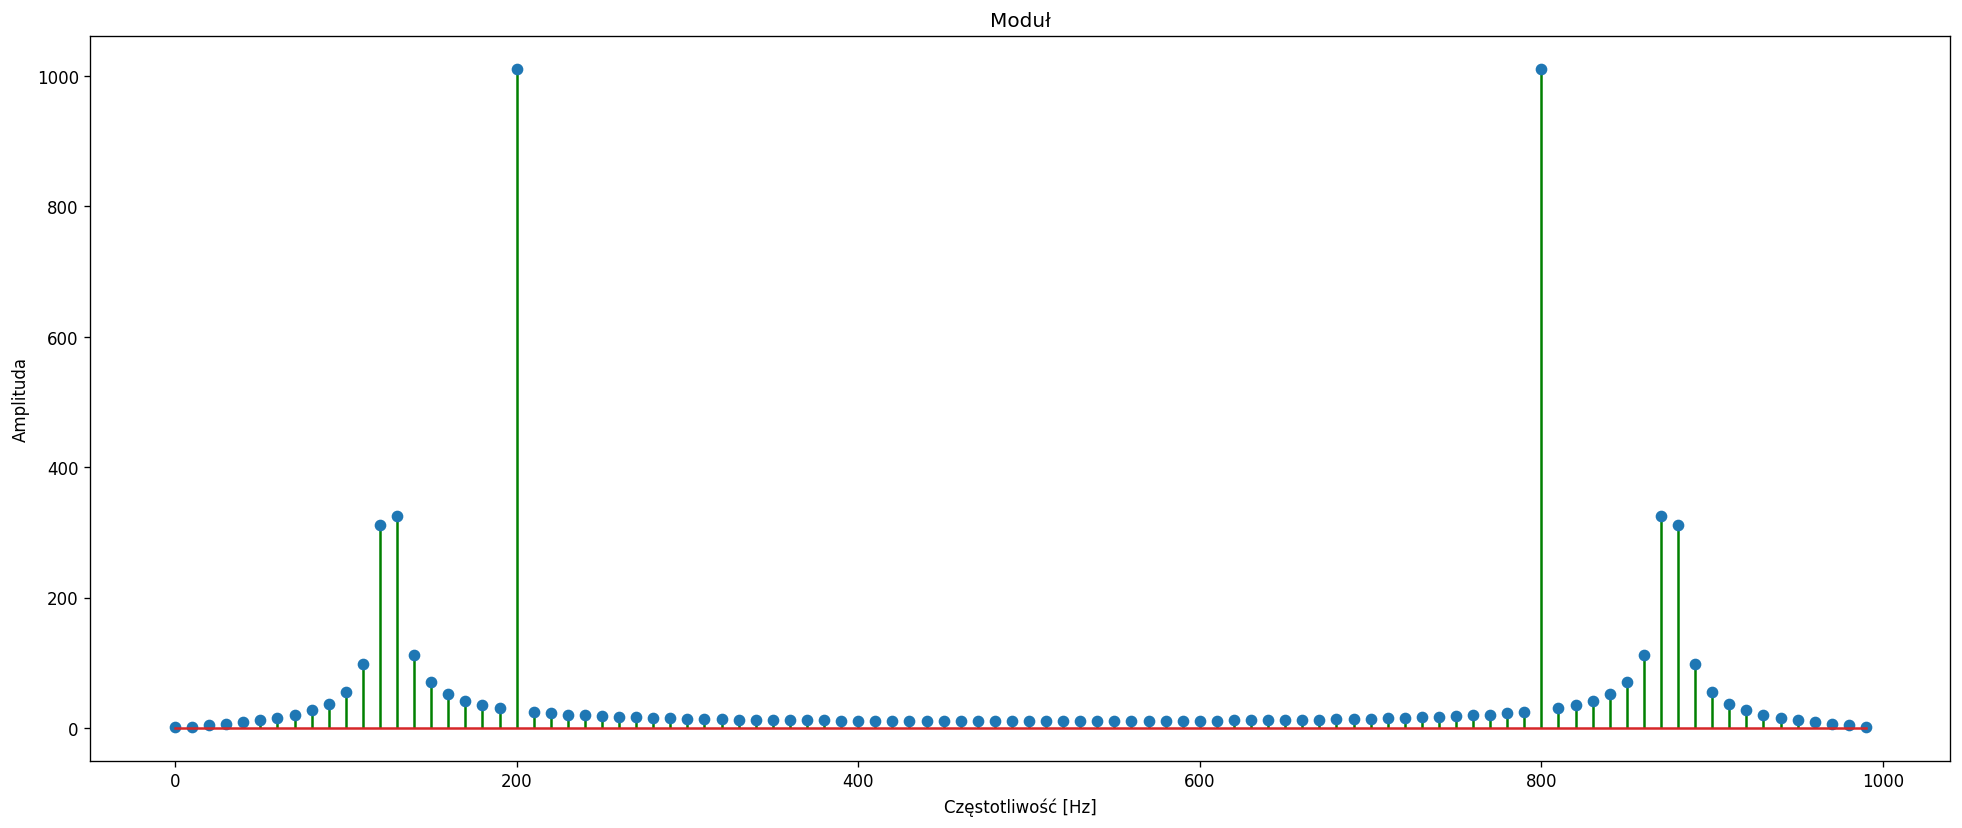

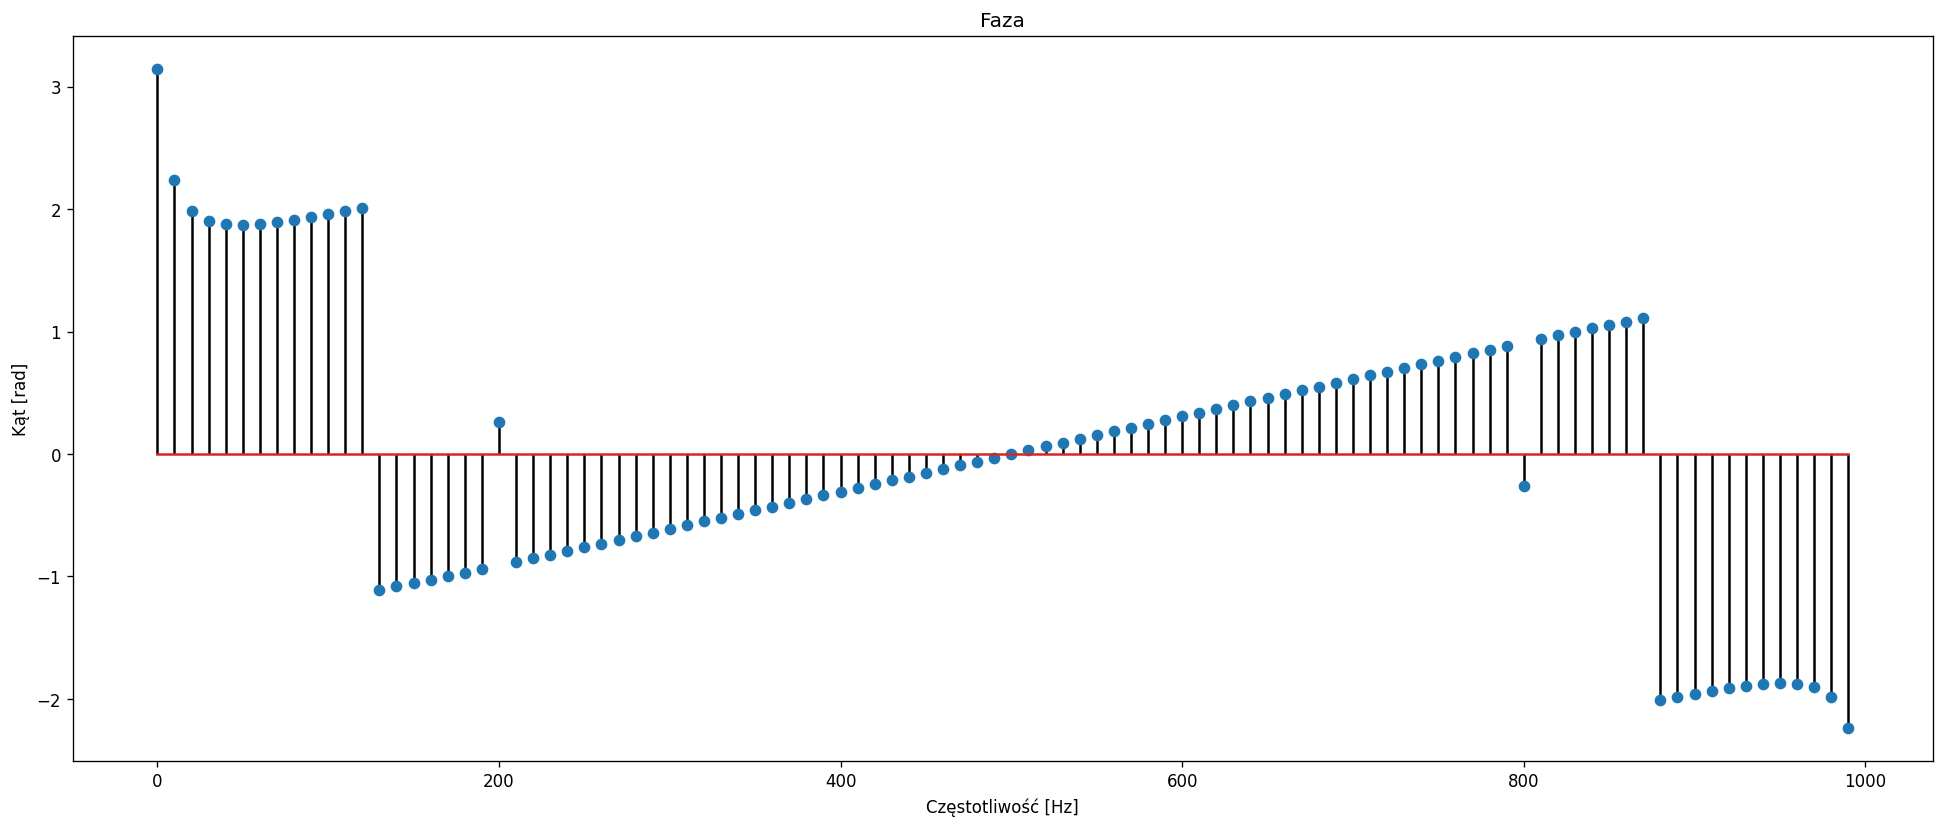

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv


# Dane
fs = 1000
f_1 = 100
f_2 = 200
a_1 = 100
a_2 = 200
o1 = math.pi/7
o2 = math.pi/11
time = 0.1
n_sample = 100

# Macierz A transformacji DFT
transform_matrix = np.zeros((n_sample, n_sample), dtype=np.complex64)
n = np.arange(0, n_sample)
for k in range(n_sample):
    transform_matrix[k, :] = (1/np.sqrt(n_sample)) \
                              * ((np.exp(1j*2*math.pi/n_sample)) ** (-k*n))

# Próbki
t = np.arange(0, time, 1/fs)

# Sygnał
x1 = a_1*np.cos(2*math.pi*f_1*t + o1)
x2 = a_2*np.cos(2*math.pi*f_2*t + o2)
x = x1 + x2

# Wykresy
plt.figure(1, figsize=(20, 8), dpi=120)
plt.plot(x1.real, 'r-o')
plt.title('Cosinus 100Hz, amplituda 100')
plt.xlabel('Numer próbki')
plt.ylabel('Część rzeczywista')

plt.figure(2, figsize=(20, 8), dpi=120)
plt.plot(x2.real, 'g-o')
plt.title('Cosinus 200Hz, amplituda 200')
plt.xlabel('Numer próbki')
plt.ylabel('Część rzeczywista')

plt.figure(3, figsize=(20, 8), dpi=120)
plt.plot(x.real, 'b-o')
plt.title('Sygnał x(t) - suma cosinusów')
plt.xlabel('Numer próbki')
plt.ylabel('Część rzeczywista')

# DFT
x_dft = np.dot(transform_matrix, x.T)

# Wykresy widma
f = fs*np.arange(0, n_sample)/n_sample

plt.figure(4, figsize=(20, 8), dpi=120)
plt.stem(f, x_dft.real, 'b-o', use_line_collection=True)
plt.title('Część rzeczywista Re(X)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Część rzeczywista')

plt.figure(5, figsize=(20, 8), dpi=120)
plt.stem(f, x_dft.imag, 'r-o', use_line_collection=True)
plt.title('Część urojona Im(X)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Część urojona')

plt.figure(6, figsize=(20, 8), dpi=120)
plt.stem(f, np.abs(x_dft), 'g-o', use_line_collection=True)
plt.title('Moduł')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')

plt.figure(7, figsize=(20, 8), dpi=120)
plt.stem(f, np.angle(x_dft), 'k-o', use_line_collection=True)
plt.title('Faza')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Kąt [rad]')

# Porównanie sygnału oryginalnego i zrekonstruowanego
inv_transform_matrix = inv(transform_matrix)
reconstructed_x = np.dot(inv_transform_matrix, x_dft)

plt.figure(8, figsize=(20, 8), dpi=120)
plt.plot(x.real, 'k')
plt.title('Sygnał oryginalny x(t))')
plt.xlabel('Próbki')
plt.ylabel('Część rzeczywista')

plt.figure(9, figsize=(20, 8), dpi=120)
plt.plot(reconstructed_x.real, 'b')
plt.title('Sygnał zrekonstruowany xr(t)')
plt.xlabel('Próbki')
plt.ylabel('Część rzeczywista')

# Błędy przy rekonstrukcjach
signal_to_reconstruction_error_1 = np.amax(np.abs(x - reconstructed_x.T))
print('Zrekonstruowano sygnał x do xr z błędem: ' 
      + str(signal_to_reconstruction_error_1))
x_dft = np.fft.fft(x)
reconstructed_x = np.fft.ifft(x_dft)
signal_to_reconstruction_error_2 = np.amax(np.abs(x - reconstructed_x))
print('Zrekonstruowano sygnał metodami fft/ifft z błędem: ' 
      + str(signal_to_reconstruction_error_2))

# Zmiana f1 na 125Hz
f_1 = 125
x1 = a_1*np.cos(2*math.pi*f_1*t + o1)
x2 = a_2*np.cos(2*math.pi*f_2*t + o2)
x = x1 + x2

# Wykresy
plt.figure(10, figsize=(20, 8), dpi=120)
plt.plot(x1.real, 'r-o')
plt.title('Cosinus 125Hz, amplituda 100')
plt.xlabel('Numer próbki')
plt.ylabel('Część rzeczywista')

plt.figure(11, figsize=(20, 8), dpi=120)
plt.plot(x2.real, 'g-o')
plt.title('Cosinus 200Hz, amplituda 200')
plt.xlabel('Numer próbki')
plt.ylabel('Część rzeczywista')

plt.figure(12, figsize=(20, 8), dpi=120)
plt.plot(x.real, 'b-o')
plt.title('Sygnał x(t) - suma cosinusów')
plt.xlabel('Numer próbki')
plt.ylabel('Część rzeczywista')

# DFT
x_dft = np.dot(transform_matrix, x.T)

# Wykresy widma
f = fs*(np.arange(0, n_sample))/n_sample

plt.figure(13, figsize=(20, 8), dpi=120)
plt.stem(f, x_dft.real, 'b-o', use_line_collection=True)
plt.title('Część rzeczywista Re(X)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Część rzeczywista')

plt.figure(14, figsize=(20, 8), dpi=120)
plt.stem(f, x_dft.imag, 'r-o', use_line_collection=True)
plt.title('Część urojona Im(X)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Część urojona')

plt.figure(15, figsize=(20, 8), dpi=120)
plt.stem(f, np.abs(x_dft), 'g-o', use_line_collection=True)
plt.title('Moduł')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')

plt.figure(16, figsize=(20, 8), dpi=120)
plt.stem(f, np.angle(x_dft), 'k-o', use_line_collection=True)
plt.title('Faza')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Kąt [rad]')


## **2. DtFT (1 pkt)**

Ustaw *f1=125* Hz i przyjmij $X_{1}=X$ (z poprzedniego ćwiczenia). Następnie zwiększ rozdzielczość częstotliwości poprzez dołączenie *M=100* zer na końcu sygnału $x$ (otrzymujemy sygnał $x_{z}$) oraz wykonaj skalowanie `X2=fft(xz)./(N+M)` (otrzymujemy $X_{2}$), które jest obliczane według wzoru:

$
X_{2}(k)=\frac{1}{N+M} \sum_{n=0}^{N+M-1} x_{z}(n) e^{-j\frac{2\pi}{N}kn}
$

gdzie *k=0,1,...,N+M*. Zwróć uwagę, że sygnał $x_{z}$ ma teraz długość *N+M* próbek i jest rozszerzony *M* zerami. 

Następnie oblicz *X3* stosując wzór na DtFT(x):

$X_{3}(f)=\frac{1}{N} \sum_{n=0}^{N-1} x(n) e^{-j 2\pi \frac{f}{f_{s}}n}$

stosując wartości *f=0:0.25:1000* Hz. Wyznacz trzy widma:
> $X_{1}$  czyli DFT o długości *N*, sygnału próbkowanego częstotliwością *fs* gdzie wektor częstotliwości można wyliczyć jako: `fx1=fs*(0:N-1)/N`

> $X_{2}$ (DFT z dodaniem zer), wyznacz odpowiedni wektor `fx2`

> $X_{3}$ (DtFT), wyznacz odpowiedni wektor `fx3`.

Narysuj wartości bezwzględne tych widm na jednym rysunku za pomocą instrukcji: `plot(fx1,X1,'o',fx2,X2,'bx',fx3,X3,'k-')`. Następnie oblicz $X_{3}$ dla *f=-2000:0.25:2000* Hz *(-2fs:df:2fs)* i ponownie narysuj trzy widma $X_{1}$, $X_{2}$, $X_{3}$ na jednym rysunku. Jak widać obliczone widma $X_{1}$ i $X_{2}$ są (a)symetryczne, a widmo $X_{3}$ jest okresowe. Dlatego wystarczy rysować widma tylko dla *f=0:df:fs/2*.




In [ ]:
import math
import numpy as np
import plotly.graph_objects as go

# Dane
fs = 1000
f_1 = 125
f_2 = 200
a_1 = 100
a_2 = 200
o1 = math.pi/7
o2 = math.pi/11
time = 0.1
n_sample = 100
number_of_zeros = 100

# Macierz A transformacji DFT
transform_matrix = np.zeros((n_sample, n_sample), dtype=np.complex64)
n = np.arange(0, n_sample)
for k in range(n_sample):
    transform_matrix[k, :] = (1/np.sqrt(n_sample)) * ((np.exp(1j*2*math.pi/n_sample)) ** (-k*n))

# Próbki
t = np.arange(0, time, 1/fs)

# Sygnał
x1 = a_1*np.cos(2*math.pi*f_1*t + o1)
x2 = a_2*np.cos(2*math.pi*f_2*t + o2)
x = x1 + x2

# DFT
x_dft = np.dot(transform_matrix, x.T)

# Zwiększenie rozdzielczości częstotliwości poprzez dołączenie
# M = 100 zer na końcu sygnału x
xz = np.concatenate((x, [0]*number_of_zeros))

# X2 FFT
x_fft = np.fft.fft(xz)/(n_sample + number_of_zeros)

# X3 DtFT
df = 0.25
f = np.arange(0, fs, df)
X = []
n = np.arange(0, n_sample)
const = -1j*2*n*np.pi/fs
for f_elem in f:
    sum_elements = x[n]*np.exp(const*f_elem)
    X.append(np.sum(sum_elements)/n_sample)
x_dtft = np.array(X)

# Wykresy części rzeczywistych
x_axis = np.arange(0, fs, fs/n_sample)
fig_1 = go.Figure()
fig_1.add_trace(go.Scatter(x=x_axis, y=x_dft.real, name="X1"))
fig_1.update_layout(title_text="real(X1) - DFT", title_x=0.5)
fig_1.update_xaxes(title_text="Częstotliwość [Hz]")
fig_1.update_yaxes(title_text="Część rzeczywista")
fig_1.show()

x_axis = np.arange(0, fs, fs/(n_sample + number_of_zeros))
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=x_axis, y=x_fft.real, name="X2"))
fig_2.update_layout(title_text="real(X2) - 100 zer na końcu", title_x=0.5)
fig_2.update_xaxes(title_text="Częstotliwość [Hz]")
fig_2.update_yaxes(title_text="Część rzeczywista")
fig_2.show()

x_axis = np.arange(0, fs, df)
fig_3 = go.Figure()
fig_3.add_trace(go.Scatter(x=x_axis, y=x_dtft.real, name="X3"))
fig_3.update_layout(title_text="real(X3) - DtFT", title_x=0.5)
fig_3.update_xaxes(title_text="Częstotliwość [Hz]")
fig_3.update_yaxes(title_text="Część rzeczywista")
fig_3.show()

# Wartości rzeczywiste widm
fx_1 = np.arange(0, fs, fs / n_sample)
fx_2 = np.arange(0, fs, fs / (n_sample + number_of_zeros))
fx_3 = np.arange(0, fs, df)

fig_4 = go.Figure()
fig_4.add_trace(go.Scatter(x=fx_1, y=x_dft.real, mode="lines+markers", name="X1"))
fig_4.add_trace(go.Scatter(x=fx_2, y=x_fft.real, mode="lines+markers", name="X2"))
fig_4.add_trace(go.Scatter(x=fx_3, y=x_dtft.real, mode="lines+markers", name="X3"))
fig_4.update_layout(title_text="Widma sygnału gdy X3 f=0:0.25:1000", title_x=0.5)
fig_4.update_xaxes(title_text="Częstotliwość [Hz]")
fig_4.update_yaxes(title_text="Część rzeczywista")
fig_4.show()

# Zmiana f=-2000:0.25:2000 Hz
f2 = np.arange(-2*fs, 2*fs, df)
XX = []
n = np.arange(0, n_sample)
const = -1j*2*n*np.pi/fs
for f_elem in f2:
    sum_elements = x[n]*np.exp(const*f_elem)
    XX.append(np.sum(sum_elements)/n_sample)
x_dtft_f_2 = np.array(XX)

# Wykres części rzeczywistej X3 z f=-2000:0.25:2000 Hz
fig_5 = go.Figure()
fig_5.add_trace(go.Scatter(x=f2, y=x_dtft_f_2.real, name="X3"))
fig_5.update_layout(title_text="DtFT X3, część rzeczywista, f=-2000:0.25:2000 Hz",
                    title_x=0.5)
fig_5.update_xaxes(title_text="Częstotliwość [Hz]")
fig_5.update_yaxes(title_text="Część rzeczywista")
fig_5.show()

# Wartości rzeczywiste widm
fig_6 = go.Figure()
fig_6.add_trace(go.Scatter(x=fx_1, y=x_dft.real, mode="lines+markers", name="X1"))
fig_6.add_trace(go.Scatter(x=fx_2, y=x_fft.real, mode="lines+markers", name="X2"))
fig_6.add_trace(go.Scatter(x=f2, y=x_dtft_f_2.real, mode="lines+markers", name="X3"))
fig_6.update_layout(title_text="Widma sygnału gdy X3 f=-2000:0.25:2000 Hz", 
                    title_x=0.5, xaxis_range=[0, fs/2])
fig_6.update_xaxes(title_text="Częstotliwość [Hz]")
fig_6.update_yaxes(title_text="Część rzeczywista")
fig_6.show()


## **3. DtFT, rola funkcji okien i liczby próbek (1 pkt)**

Dla sygnału z ćwiczenia 1 ustaw `f=0:0.1:500` (dla DtFT), *N=100*,  *f1=100* Hz i *f2=125* Hz, *A1=1* i *A2=0.0001*. Oblicz DtFT i wyświetl widmo. Czy widzisz obie składowe sygnału? Następnie wymnóż próbki sygnału kolejno z oknem prostokątnym, Hamminga, Blackmana, Czebyszewa (tłumienie 100 dB) i Czebyszewa (tłumienie 120 dB), oblicz DtFT i wyświetl moduły pięciu widm na jednym rysunku. Następnie ustaw w ostatnim zadaniu *N=1000* i powtórz go ale tylko dla różnych wartości tłumienia okna Czebyszewa.

In [2]:
import math
import numpy as np
import plotly.graph_objects as go
from scipy import signal


def dtft(x_func, f_func, n_func):
    """
    Funkcja przyjmuje sygnał przemnożony przez wybrane okno, zakres 
    częstotliwości oraz ilość próbek. Zwraca natomiast DtFT.
    """
    x_list = []
    n = np.arange(0, n_func)
    const = -1j*2*np.pi/fs
    for f_elem in f_func:
        sum_elements = x_func[n]*np.exp(const*f_elem*n)
        x_list.append(np.sum(sum_elements)/n_func)

    return np.array(x_list)


# Dane
n_sample = 100
fs = 1000
f_1 = 100
f_2 = 125
a_1 = 1
a_2 = 0.0001
o_1 = math.pi/7
o_2 = math.pi/11
time = 0.1

# Próbki
t = np.arange(0, (n_sample/fs), 1/fs)
n_arr = np.arange(0, n_sample, 1)

# Sygnał
x_1 = a_1*np.cos(2*math.pi*f_1*t + o_1)
x_2 = a_2*np.cos(2*math.pi*f_2*t + o_2)
x = x_1 + x_2

# DtFT
f = np.arange(0, 500, 0.1)
x_dtft_0 = dtft(x, f, n_sample)

# Wykres widma
fig_1 = go.Figure()
fig_1.add_trace(go.Scatter(x=f, y=20*(np.log10(np.abs(x_dtft_0))), name="X0"))
fig_1.update_layout(title_text="DtFT x dla N = 100", title_x=0.5, 
                    xaxis_range=[0, fs/2])
fig_1.update_xaxes(title_text="Częstotliwość [Hz]")
fig_1.update_yaxes(title_text="Amplituda")
fig_1.show()

# Mnożenie próbek sygnału z oknami:
rectangle_window = np.concatenate((signal.windows.boxcar(int(n_sample/2)), [0]*50))
x_1 = x*rectangle_window
x_2 = x*signal.windows.hamming(n_sample)
x_3 = x*signal.windows.blackman(n_sample)
x_4 = x*signal.windows.chebwin(n_sample, at=100)
x_5 = x*signal.windows.chebwin(n_sample, at=120)

# Wykresy okien
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=n_arr, y=rectangle_window, name="Prostokątne"))
fig_2.add_trace(go.Scatter(x=n_arr, y=signal.windows.hamming(n_sample),
                           name="Hamminga"))
fig_2.add_trace(go.Scatter(x=n_arr, y=signal.windows.blackman(n_sample),
                           name="Blackmana"))
fig_2.add_trace(go.Scatter(x=n_arr, y=signal.windows.chebwin(n_sample, at=100),
                           name="Czebyszewa 100 dB"))
fig_2.add_trace(go.Scatter(x=n_arr, y=signal.windows.chebwin(n_sample, at=120),
                           name="Czebyszewa 120 dB"))
fig_2.update_layout(title_text="Okna dla N = 100", title_x=0.5, 
                    xaxis_range=[0, n_sample])
fig_2.update_xaxes(title_text="Próbki")
fig_2.update_yaxes(title_text="Amplituda")
fig_2.show()

# DtFT sygnałów z oknami
x_dtft_1 = dtft(x_1, f, n_sample)
x_dtft_2 = dtft(x_2, f, n_sample)
x_dtft_3 = dtft(x_3, f, n_sample)
x_dtft_4 = dtft(x_4, f, n_sample)
x_dtft_5 = dtft(x_5, f, n_sample)

# Wykresy widm
fig_3 = go.Figure()
fig_3.add_trace(go.Scatter(x=f, y=20*(np.log10(np.abs(x_dtft_1))),
                           name="x z o. Prostokątne"))
fig_3.add_trace(go.Scatter(x=f, y=20*(np.log10(np.abs(x_dtft_2))), 
                           name="x z o. Hamminga"))
fig_3.add_trace(go.Scatter(x=f, y=20*(np.log10(np.abs(x_dtft_3))), 
                           name="x z o. Blackmana"))
fig_3.add_trace(go.Scatter(x=f, y=20*(np.log10(np.abs(x_dtft_4))), 
                           name="x z o. Czebyszewa 100 dB"))
fig_3.add_trace(go.Scatter(x=f, y=20*(np.log10(np.abs(x_dtft_5))), 
                           name="x z o. Czebyszewa 120 dB"))
fig_3.update_layout(title_text="DtFT iloczyny z oknami dla N = 100", title_x=0.5)
fig_3.update_xaxes(title_text="Częstotliwość [Hz]")
fig_3.update_yaxes(title_text="Amplituda")
fig_3.show()

# Dla N = 1000
n_sample = 1000

# Próbki
t = np.arange(0, (n_sample/fs), 1/fs)
N_arr_1000 = np.arange(0, n_sample, 1)

# Sygnał
x_1 = a_1*np.cos(2*math.pi*f_1*t + o_1)
x_2 = a_2*np.cos(2*math.pi*f_2*t + o_2)
x = x_1 + x_2

# DtFT dla N = 1000
f = np.arange(0, 500, 0.1)
x_dtft_0_1000 = dtft(x, f, n_sample)

# Wykres widma
fig_4 = go.Figure()
fig_4.add_trace(go.Scatter(x=f, y=20*(np.log10(np.abs(x_dtft_0_1000))), 
                           name="X0_1000"))
fig_4.update_layout(title_text="DtFT x dla N = 1000", title_x=0.5, 
                    xaxis_range=[0, fs/2])
fig_4.update_xaxes(title_text="Częstotliwość [Hz]")
fig_4.update_yaxes(title_text="Amplituda")
fig_4.show()

# Mnożenie próbek sygnału z oknami dla N = 1000:
x_80 = x*signal.windows.chebwin(n_sample, at=80)
x_100 = x*signal.windows.chebwin(n_sample, at=100)
x_120 = x*signal.windows.chebwin(n_sample, at=120)
x_140 = x*signal.windows.chebwin(n_sample, at=140)

# Wykresy okien
fig_5 = go.Figure()
fig_5.add_trace(go.Scatter(x=N_arr_1000, y=signal.windows.chebwin(n_sample, at=80),
                           name="Czebyszewa 80 dB"))
fig_5.add_trace(go.Scatter(x=N_arr_1000, y=signal.windows.chebwin(n_sample, at=100),
                           name="Czebyszewa 100 dB"))
fig_5.add_trace(go.Scatter(x=N_arr_1000, y=signal.windows.chebwin(n_sample, at=120),
                           name="Czebyszewa 120 dB"))
fig_5.add_trace(go.Scatter(x=N_arr_1000, y=signal.windows.chebwin(n_sample, at=140),
                           name="Czebyszewa 140 dB"))
fig_5.update_layout(title_text="Okna dla N = 1000", title_x=0.5)
fig_5.update_xaxes(title_text="Próbki")
fig_5.update_yaxes(title_text="Amplituda")
fig_5.show()

# DtFT sygnału przemnożonego z oknami Czebyszewa dla N = 1000
x_dtft_80 = dtft(x_80, f, n_sample)
x_dtft_100 = dtft(x_100, f, n_sample)
x_dtft_120 = dtft(x_120, f, n_sample)
x_dtft_140 = dtft(x_140, f, n_sample)

# Wykresy widm
fig_6 = go.Figure()
fig_6.add_trace(go.Scatter(x=f, y=20*(np.log10(np.abs(x_dtft_80))), 
                           name="x z o. Czebyszewa 80 dB"))
fig_6.add_trace(go.Scatter(x=f, y=20*(np.log10(np.abs(x_dtft_100))), 
                           name="x z o. Czebyszewa 100 dB"))
fig_6.add_trace(go.Scatter(x=f, y=20*(np.log10(np.abs(x_dtft_120))), 
                           name="x z o. Czebyszewa 120 dB"))
fig_6.add_trace(go.Scatter(x=f, y=20*(np.log10(np.abs(x_dtft_140))), 
                           name="x z o. Czebyszewa 140 dB"))
fig_6.update_layout(title_text="DtFT iloczyny z oknami dla N = 1000", 
                    title_x=0.5, xaxis_range=[0, fs/2])
fig_6.update_xaxes(title_text="Częstotliwość [Hz]")
fig_6.update_yaxes(title_text="Amplituda")
fig_6.show()


## **4. Analiza częstotliwościowa sygnału ADSL (2 pkt)**

Wykonaj analizę częstotliwościową dostarczonego sygnału ADSL. Sygnał zawiera *K=8* ramek o długości *N=512* próbek z prefiksem *M=32* położonych jak na rysunku 4.1.

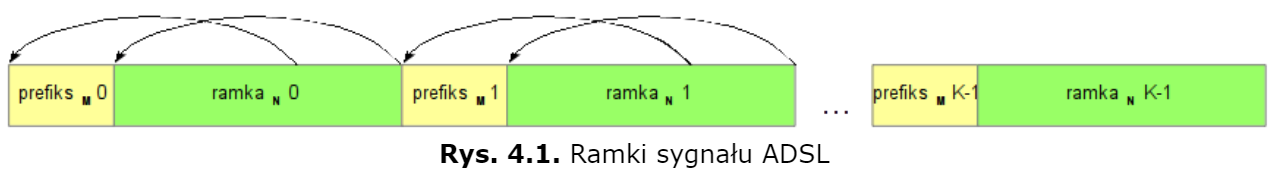

Każda ramka *N* próbek ma zaalokowanych kilkanaście różnych podkanałów częstotliwościowych czyli dane znajdują się na odpowiednich ,,harmonicznych''. Ramki sygnału rozpoczynają się od początku sygnału, tak więc *m*-ty prefiks rozpoczyna się w próbce *m**(N+M)+1.

Zadania:  

> wykonać *N*-punktowe DFT (FFT) każdej ramki (po usunięciu prefiksu)

> wyznaczyć, które harmoniczne były w niej używane.

Sygnał do analizy znajduje się w pliku `lab_03.mat`. Użyj sygnału ze wektora o nazwie `x_??` gdzie `??` jest liczbą otrzymaną jako rezultat wykonania: `mod(twoj_numer_indeksu, 16)+1`.

Downloading...
From: https://drive.google.com/uc?id=1WIq94-IBt3Z1W5_y537PzpuzFrB3Fya2
To: /content/lab_03.mat
100%|██████████| 528k/528k [00:00<00:00, 70.7MB/s]


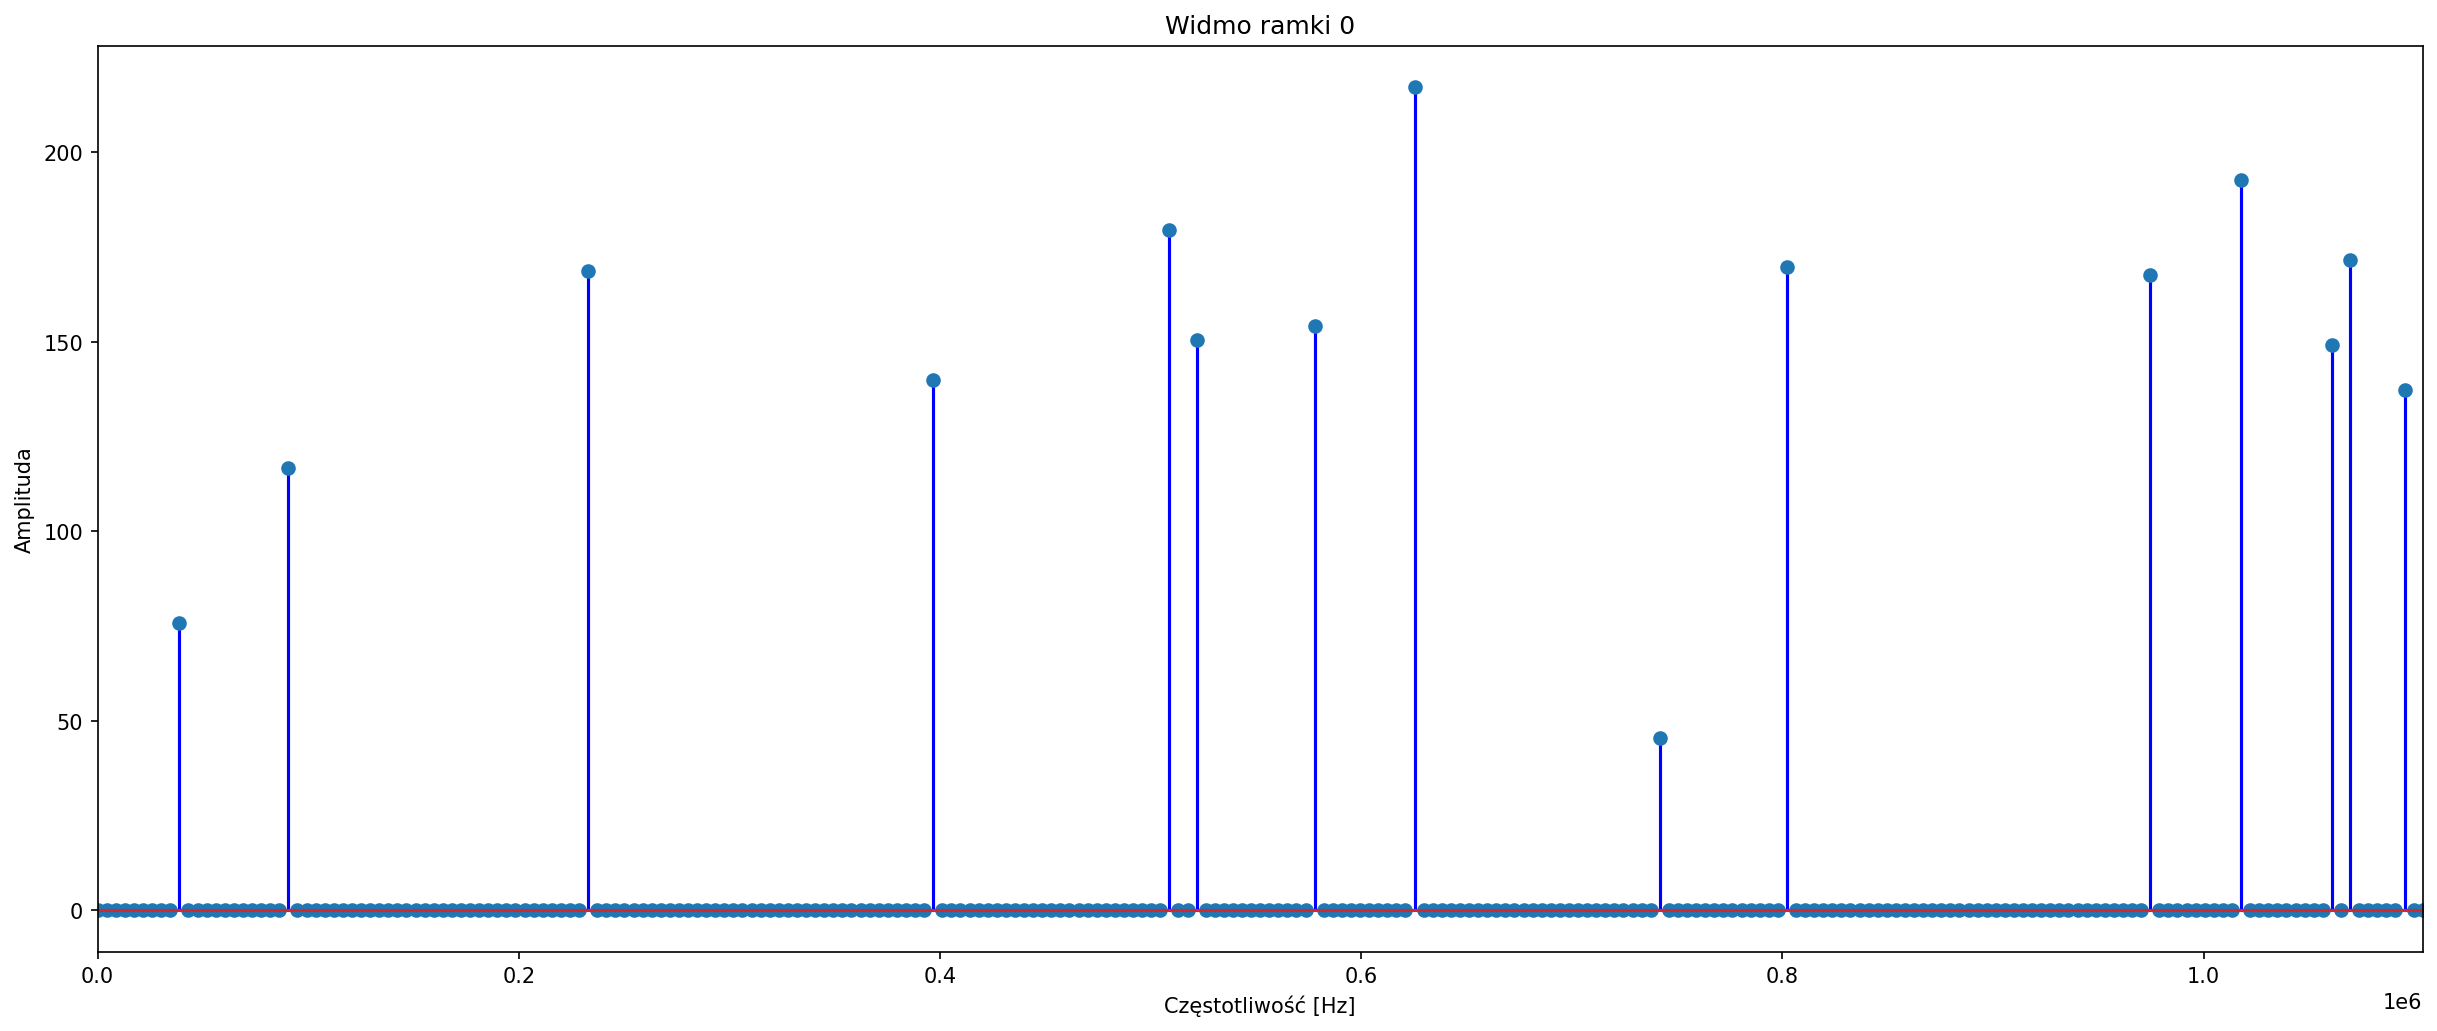

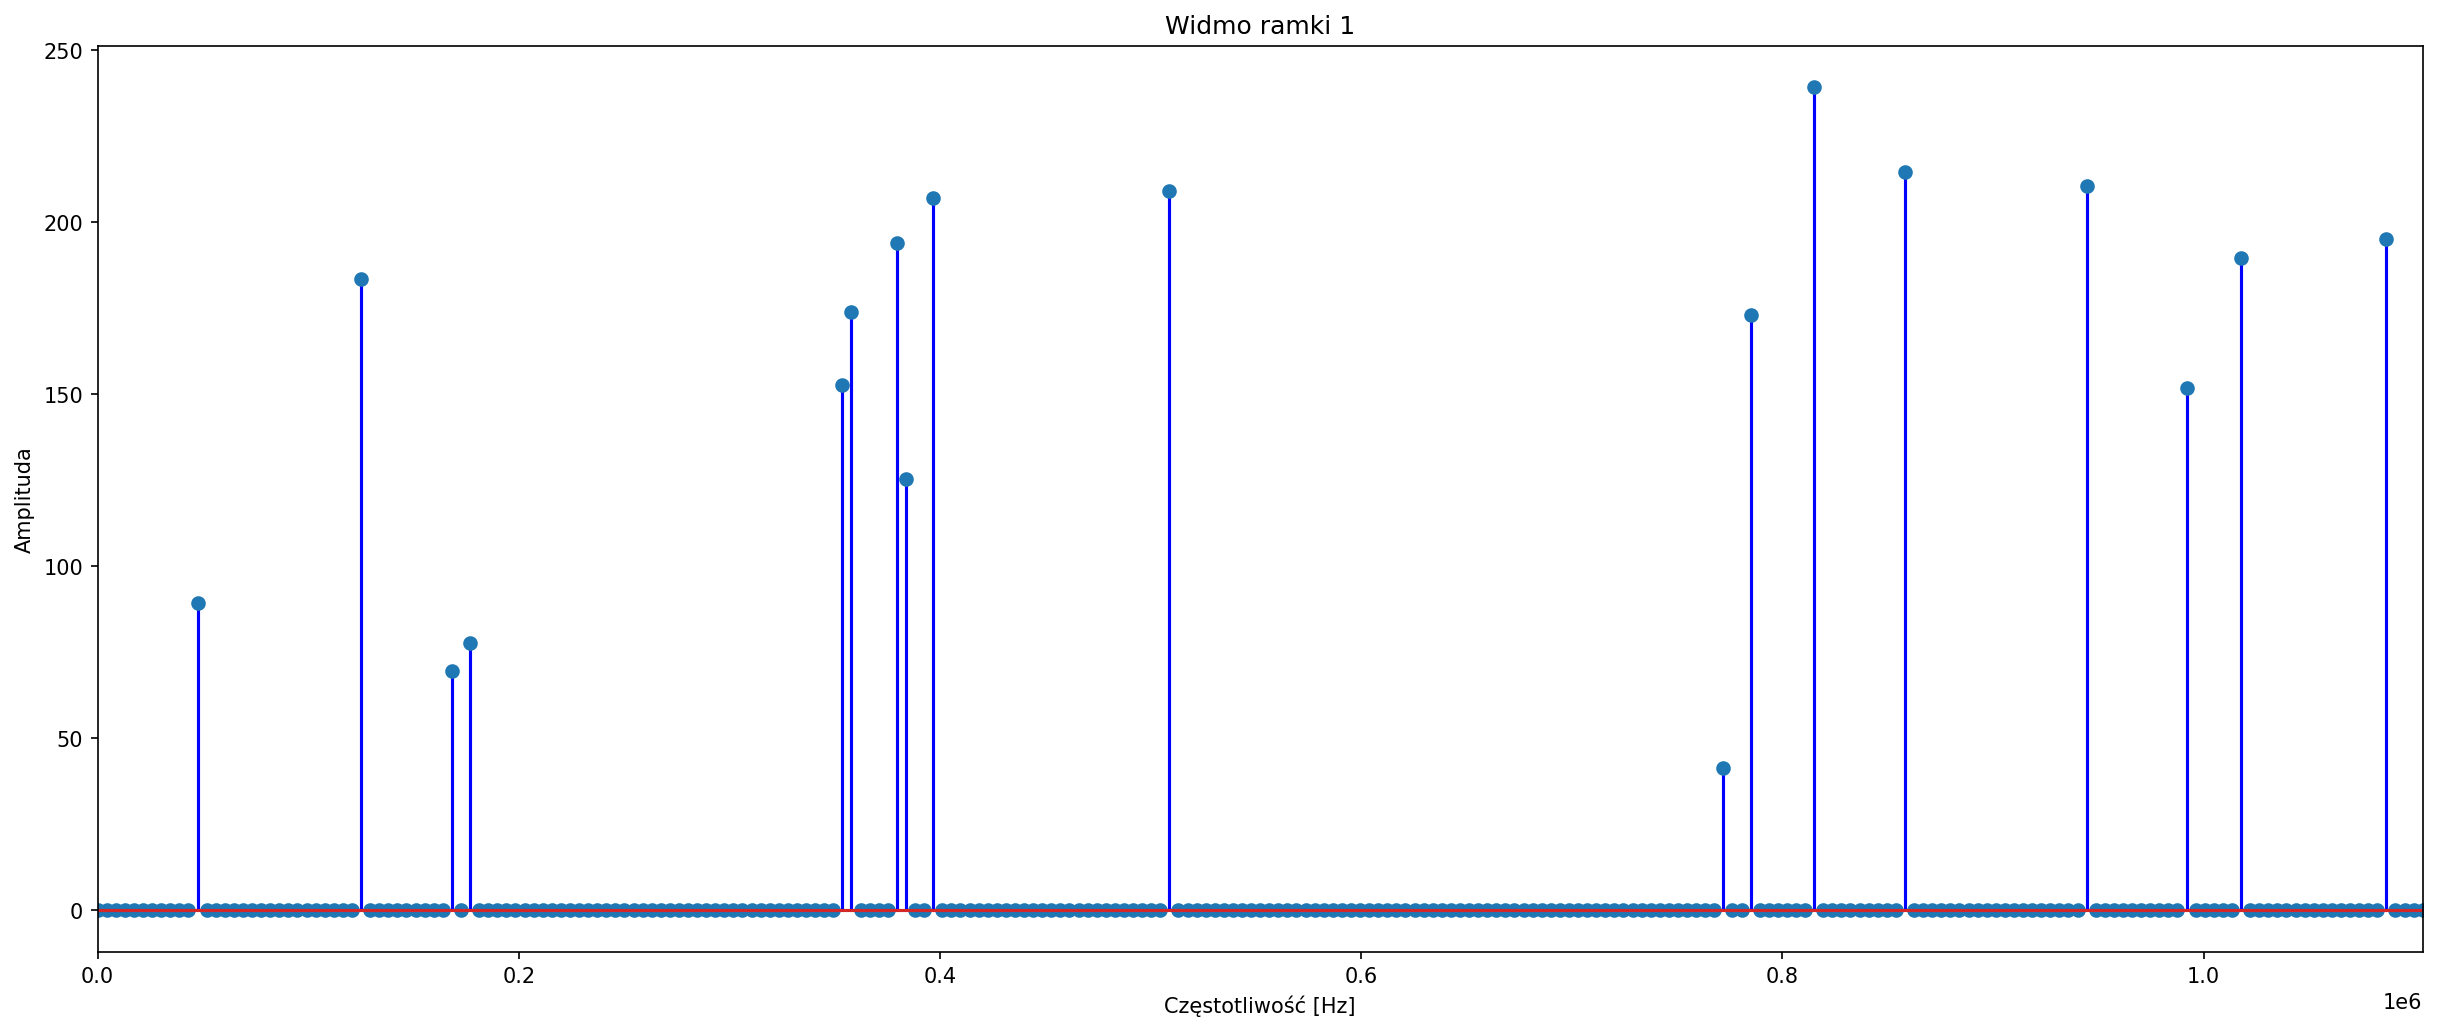

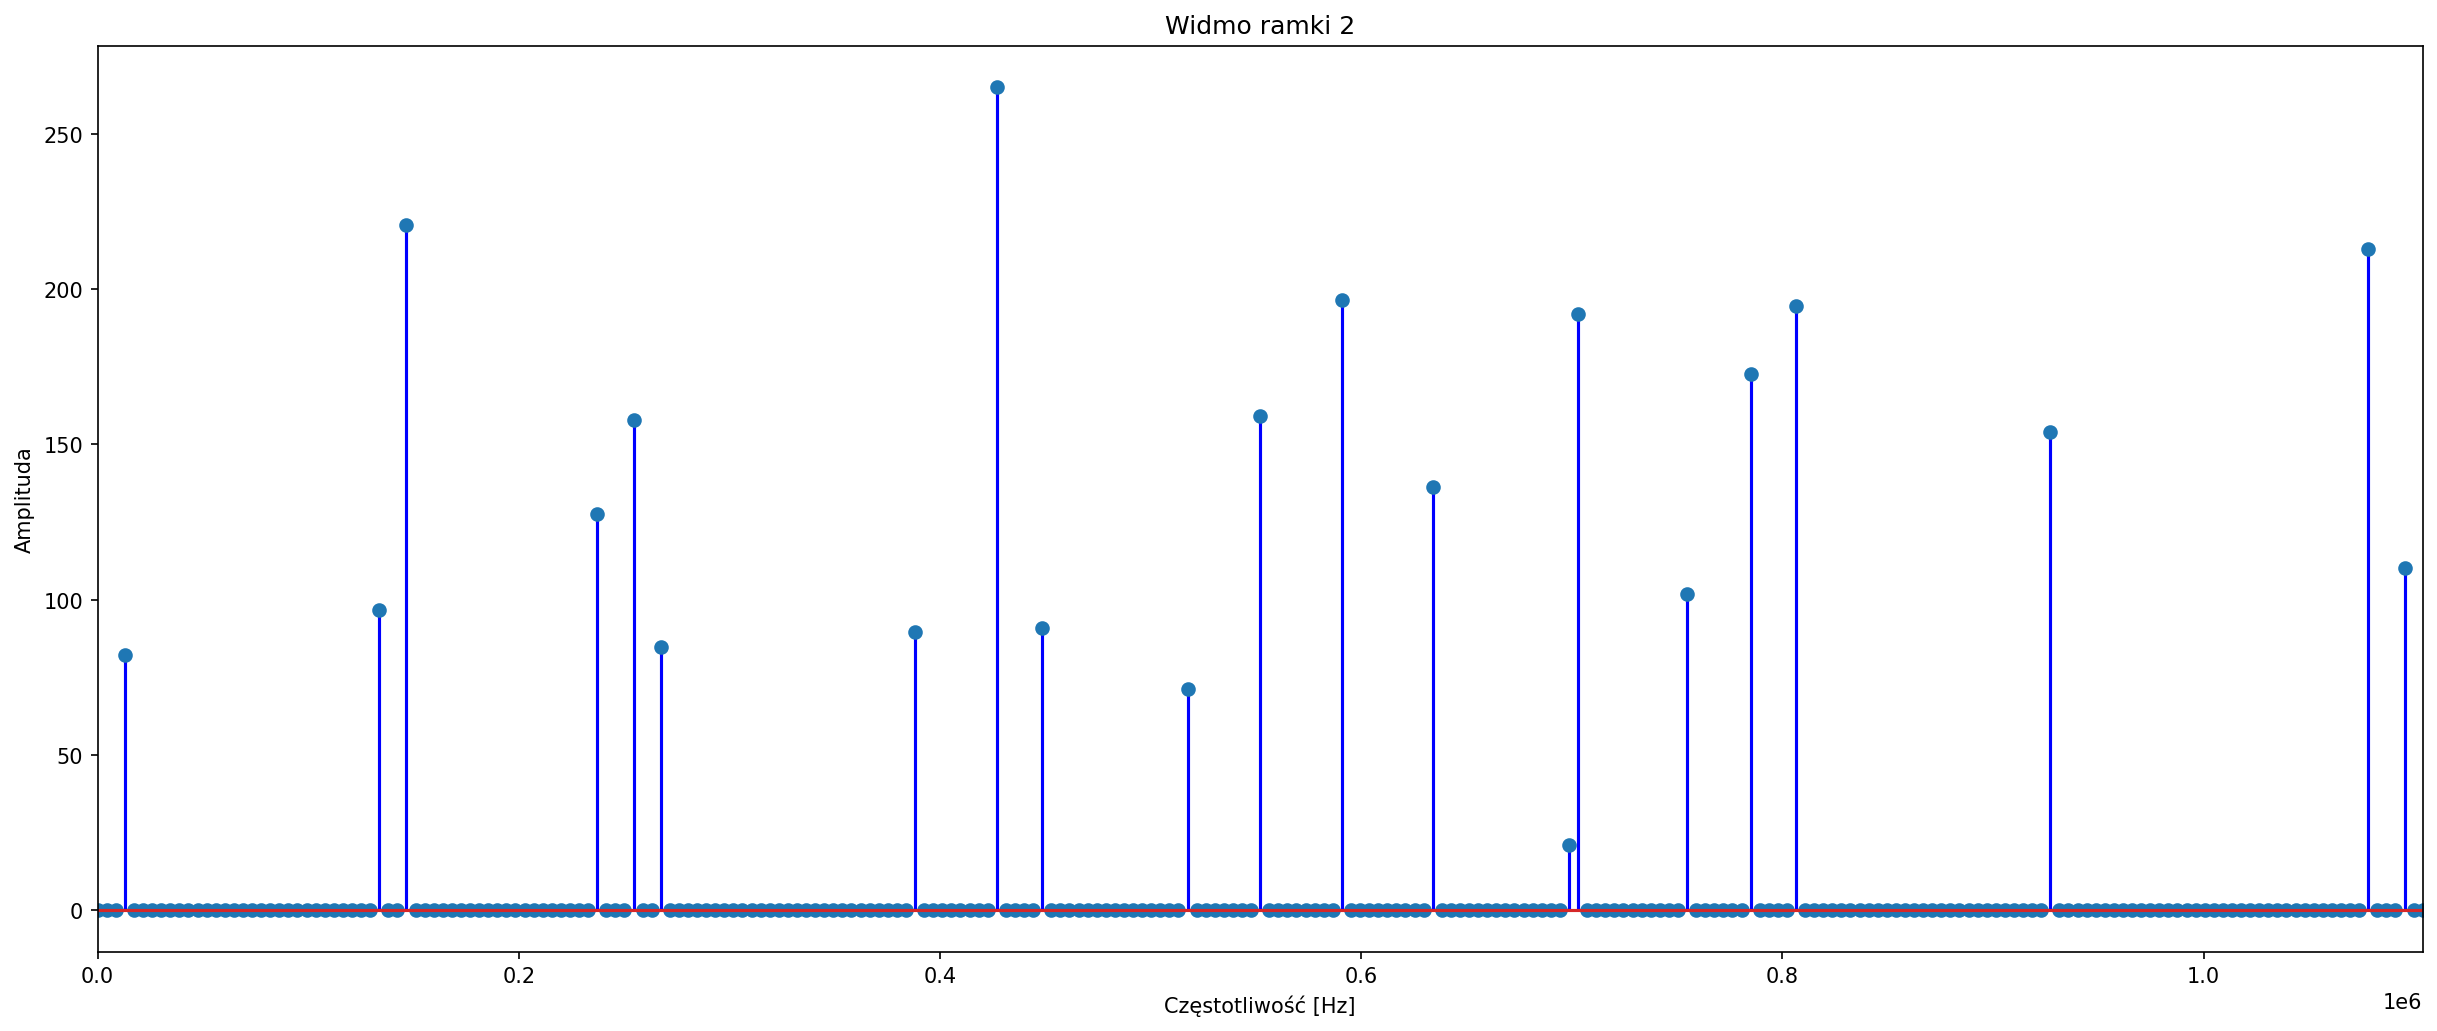

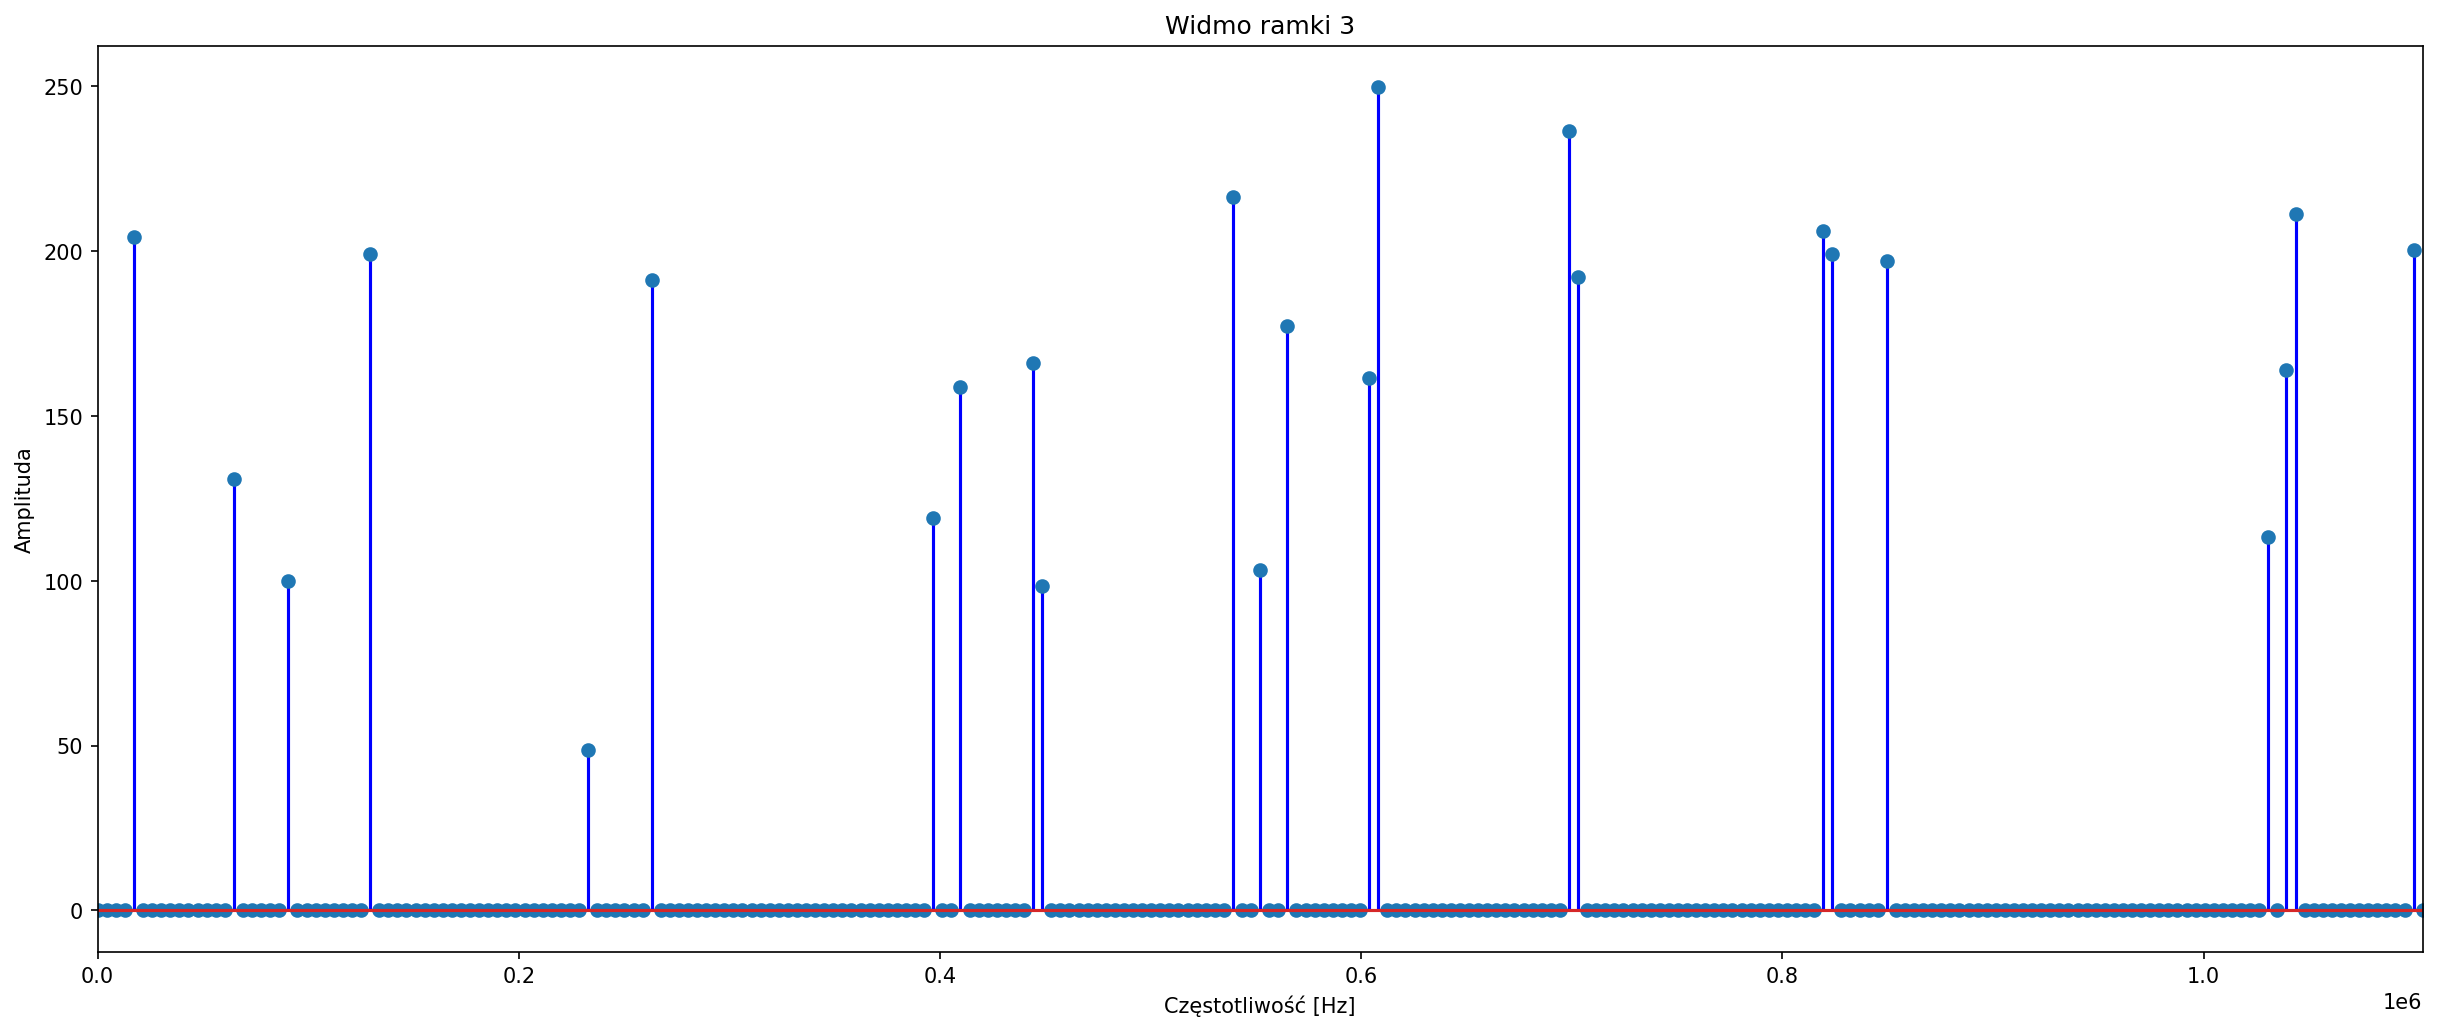

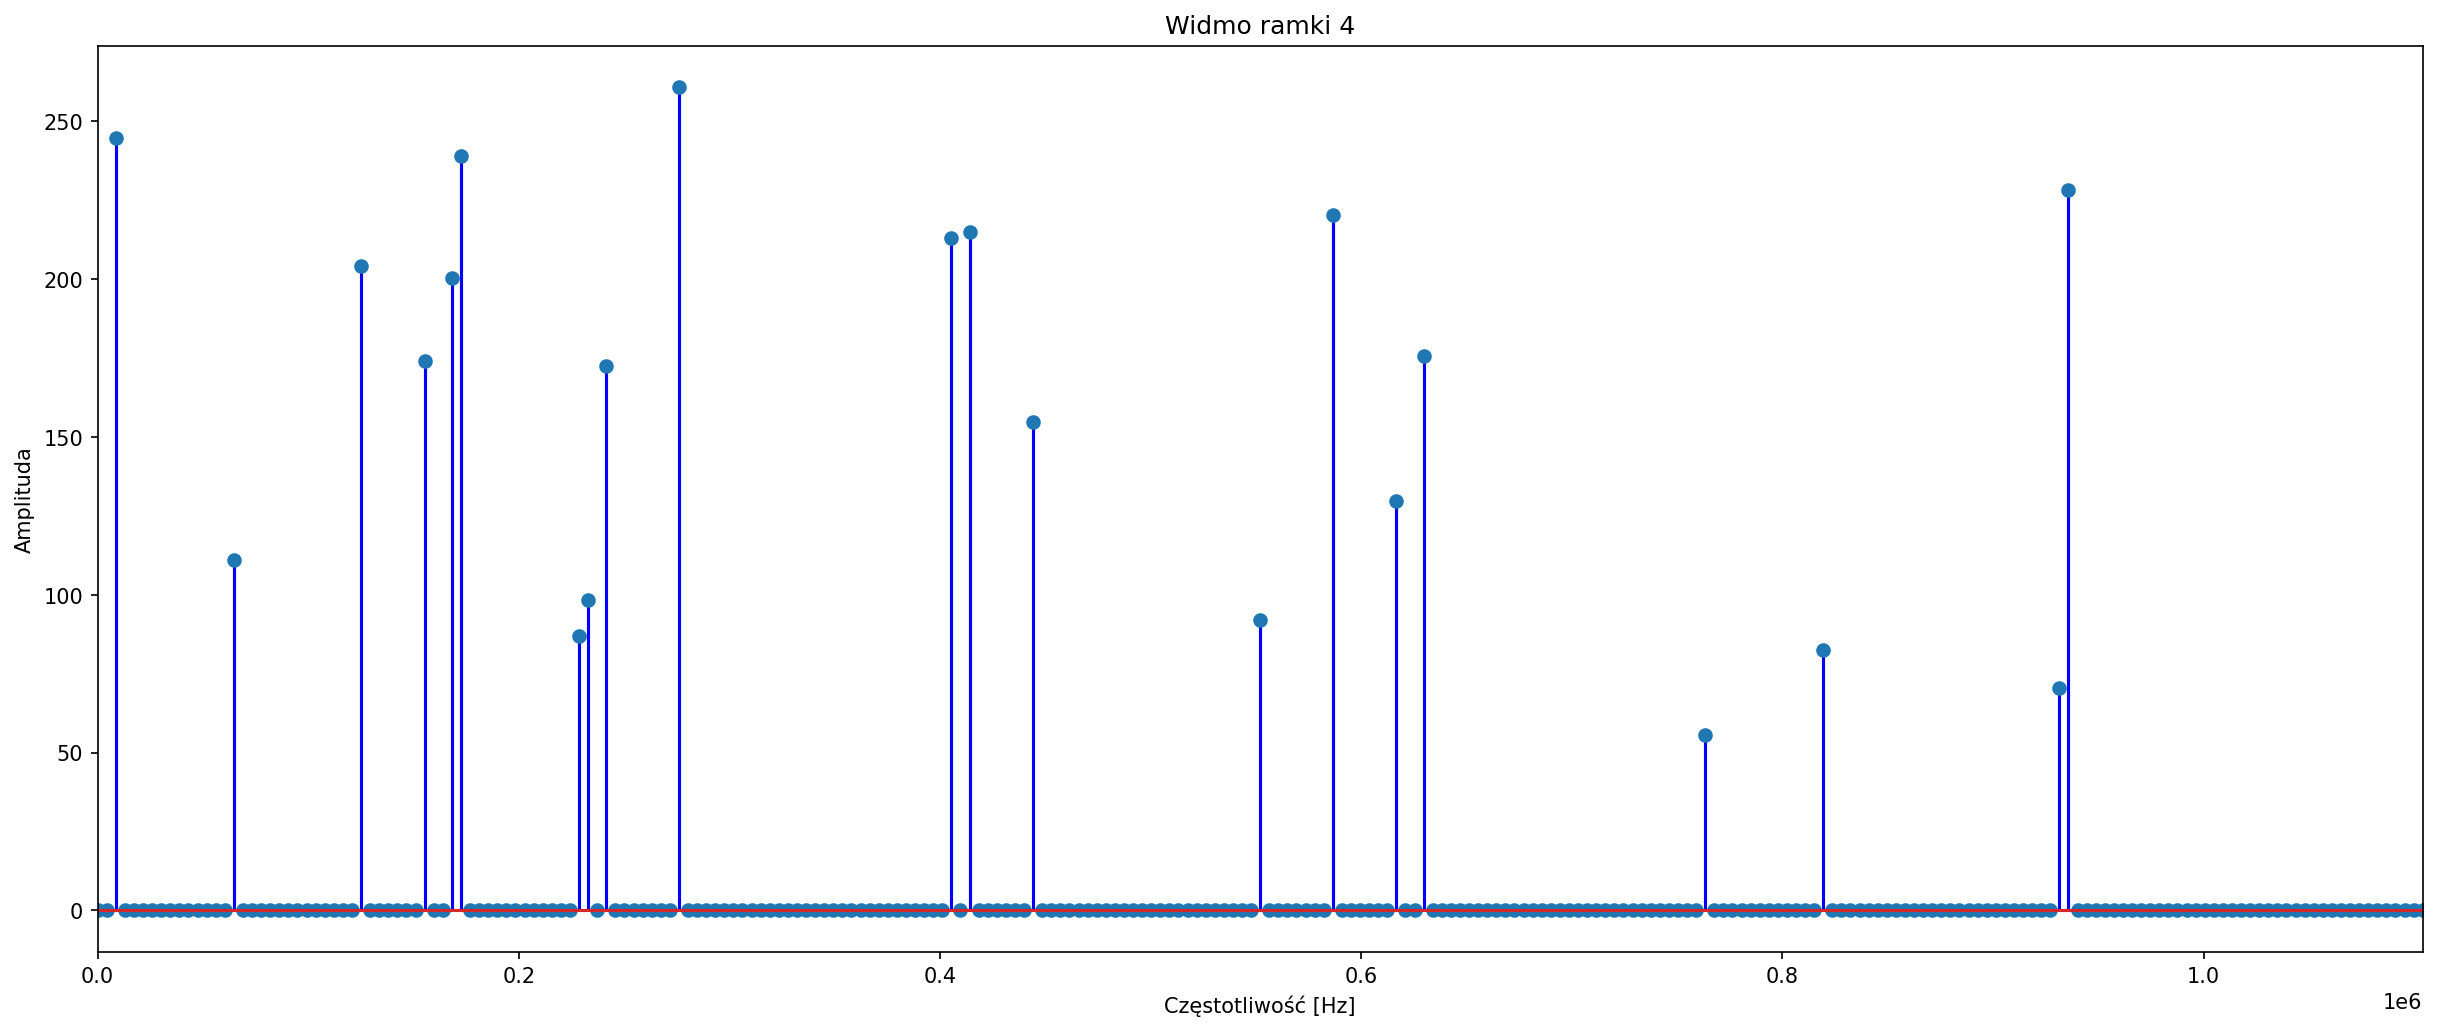

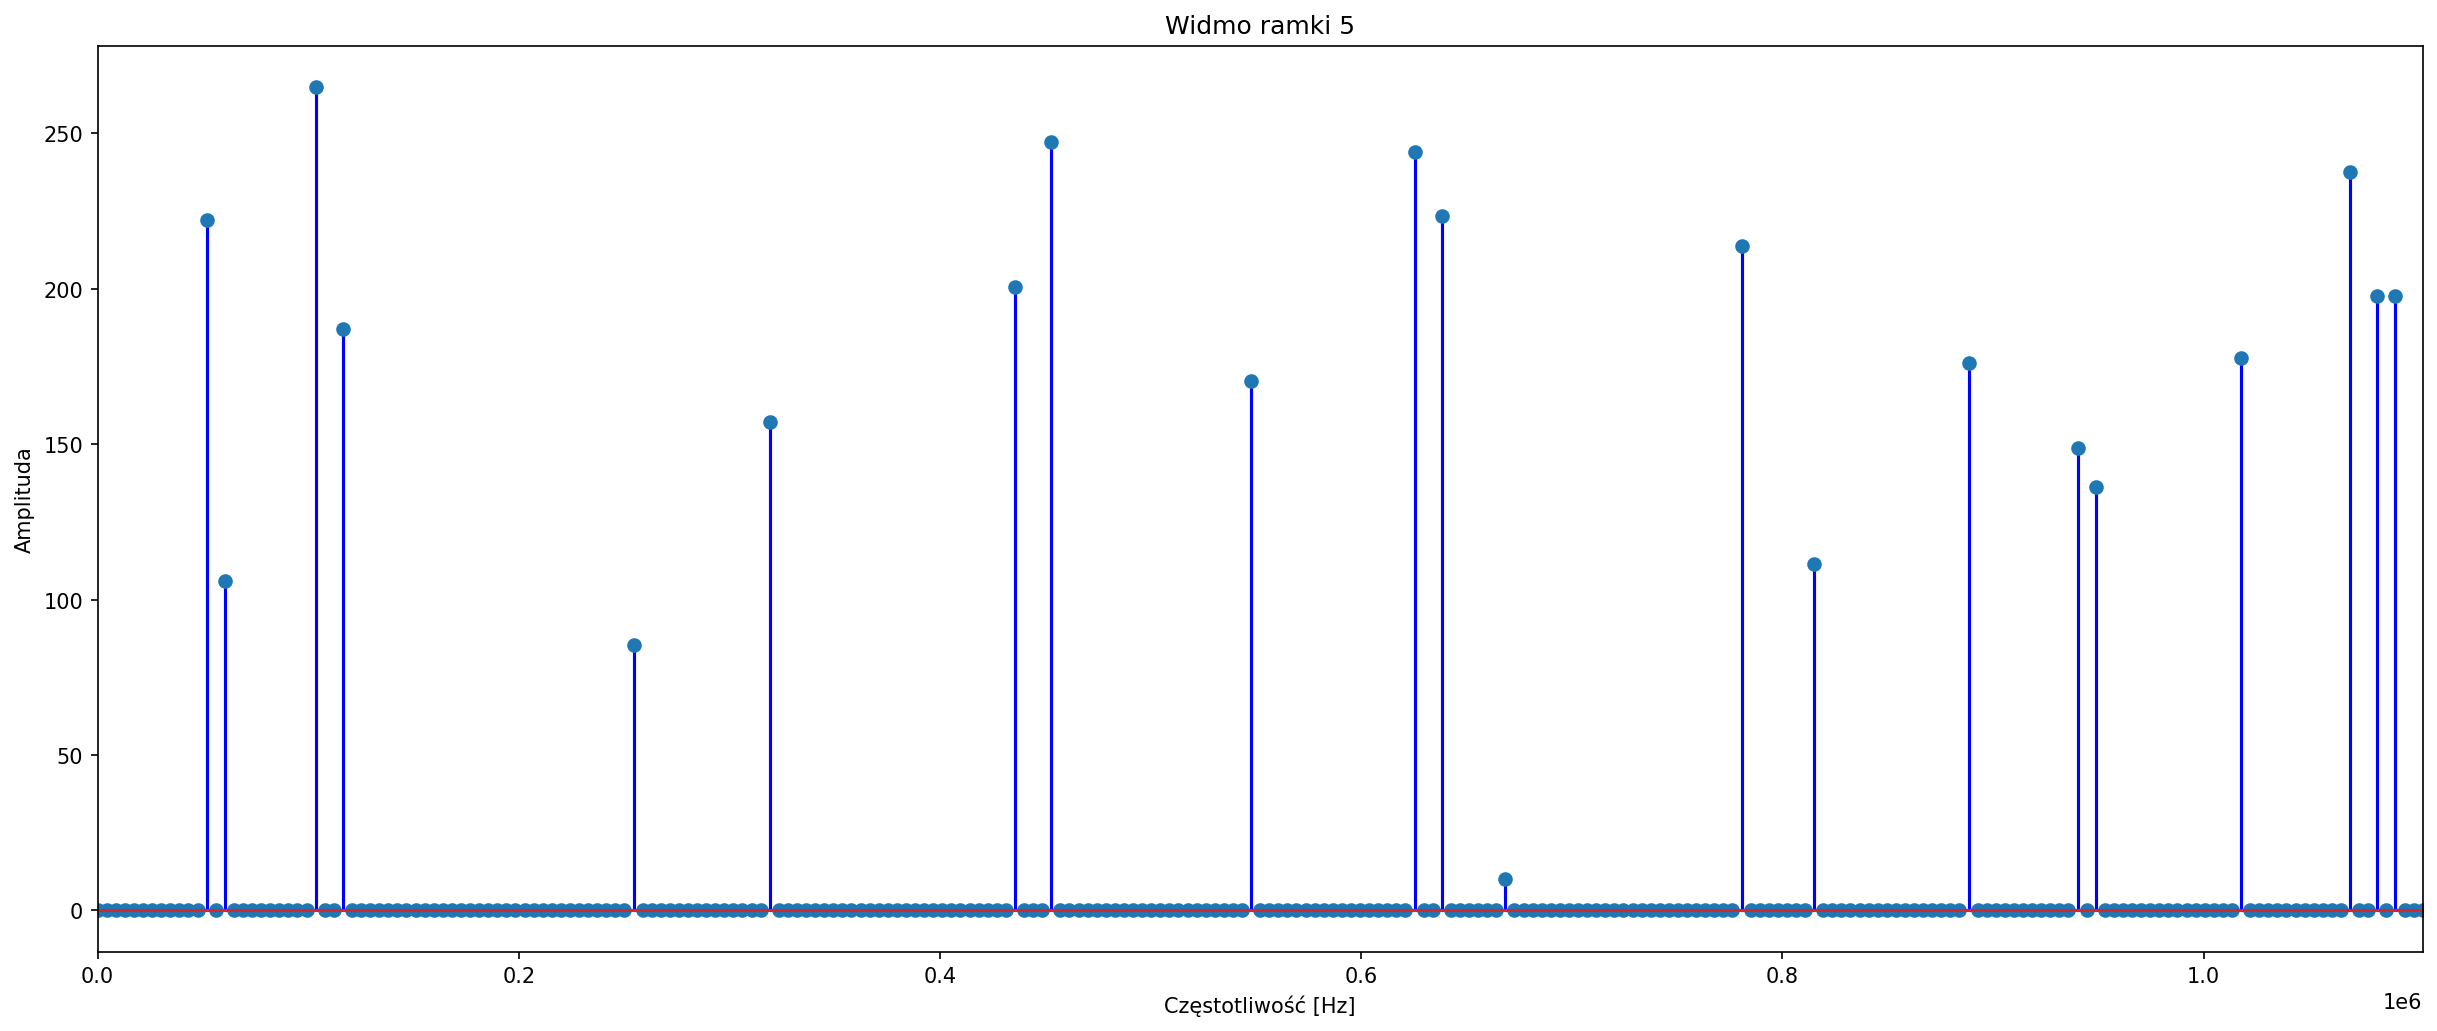

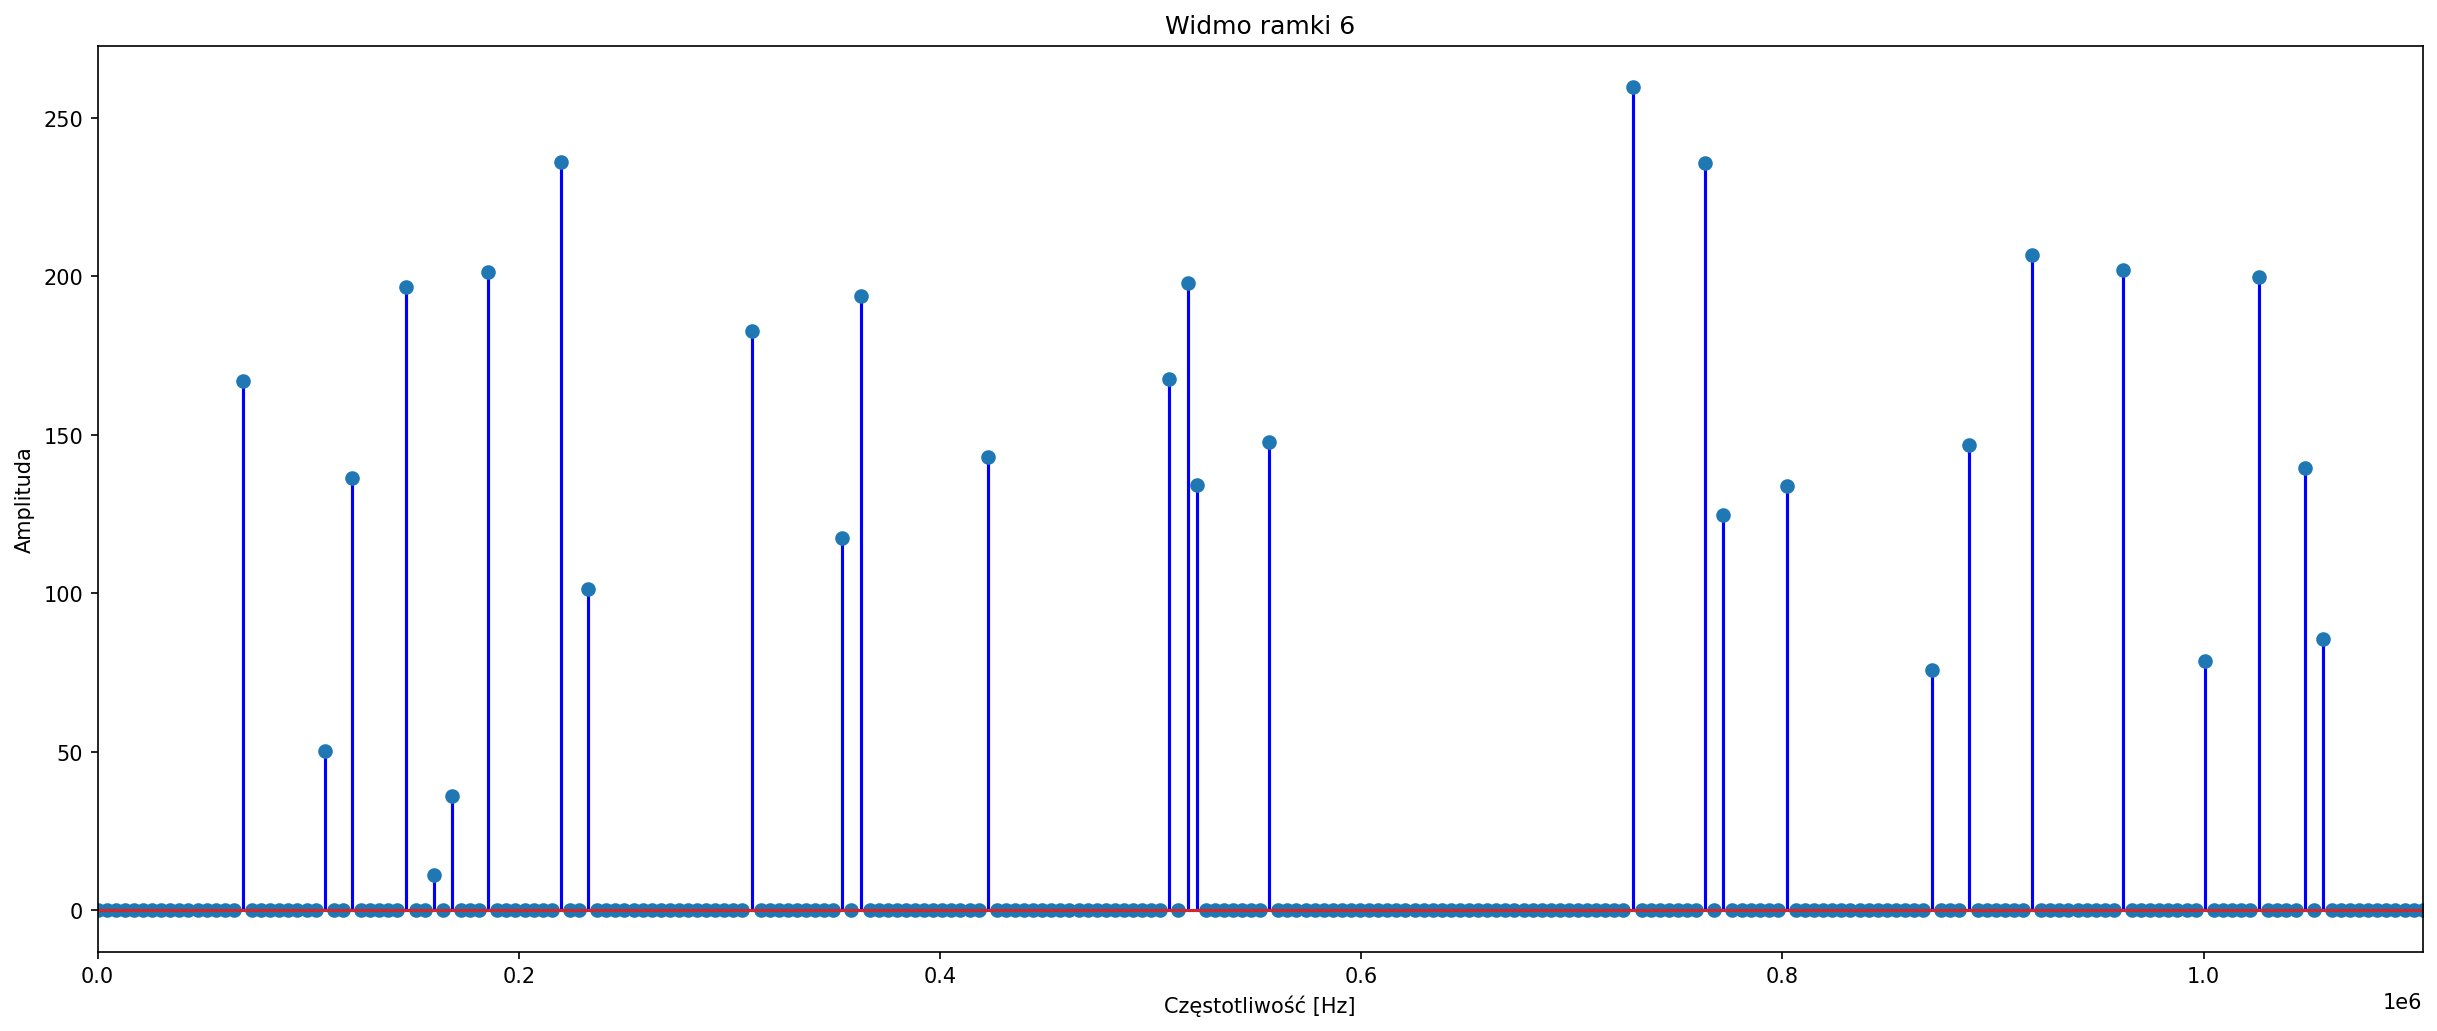

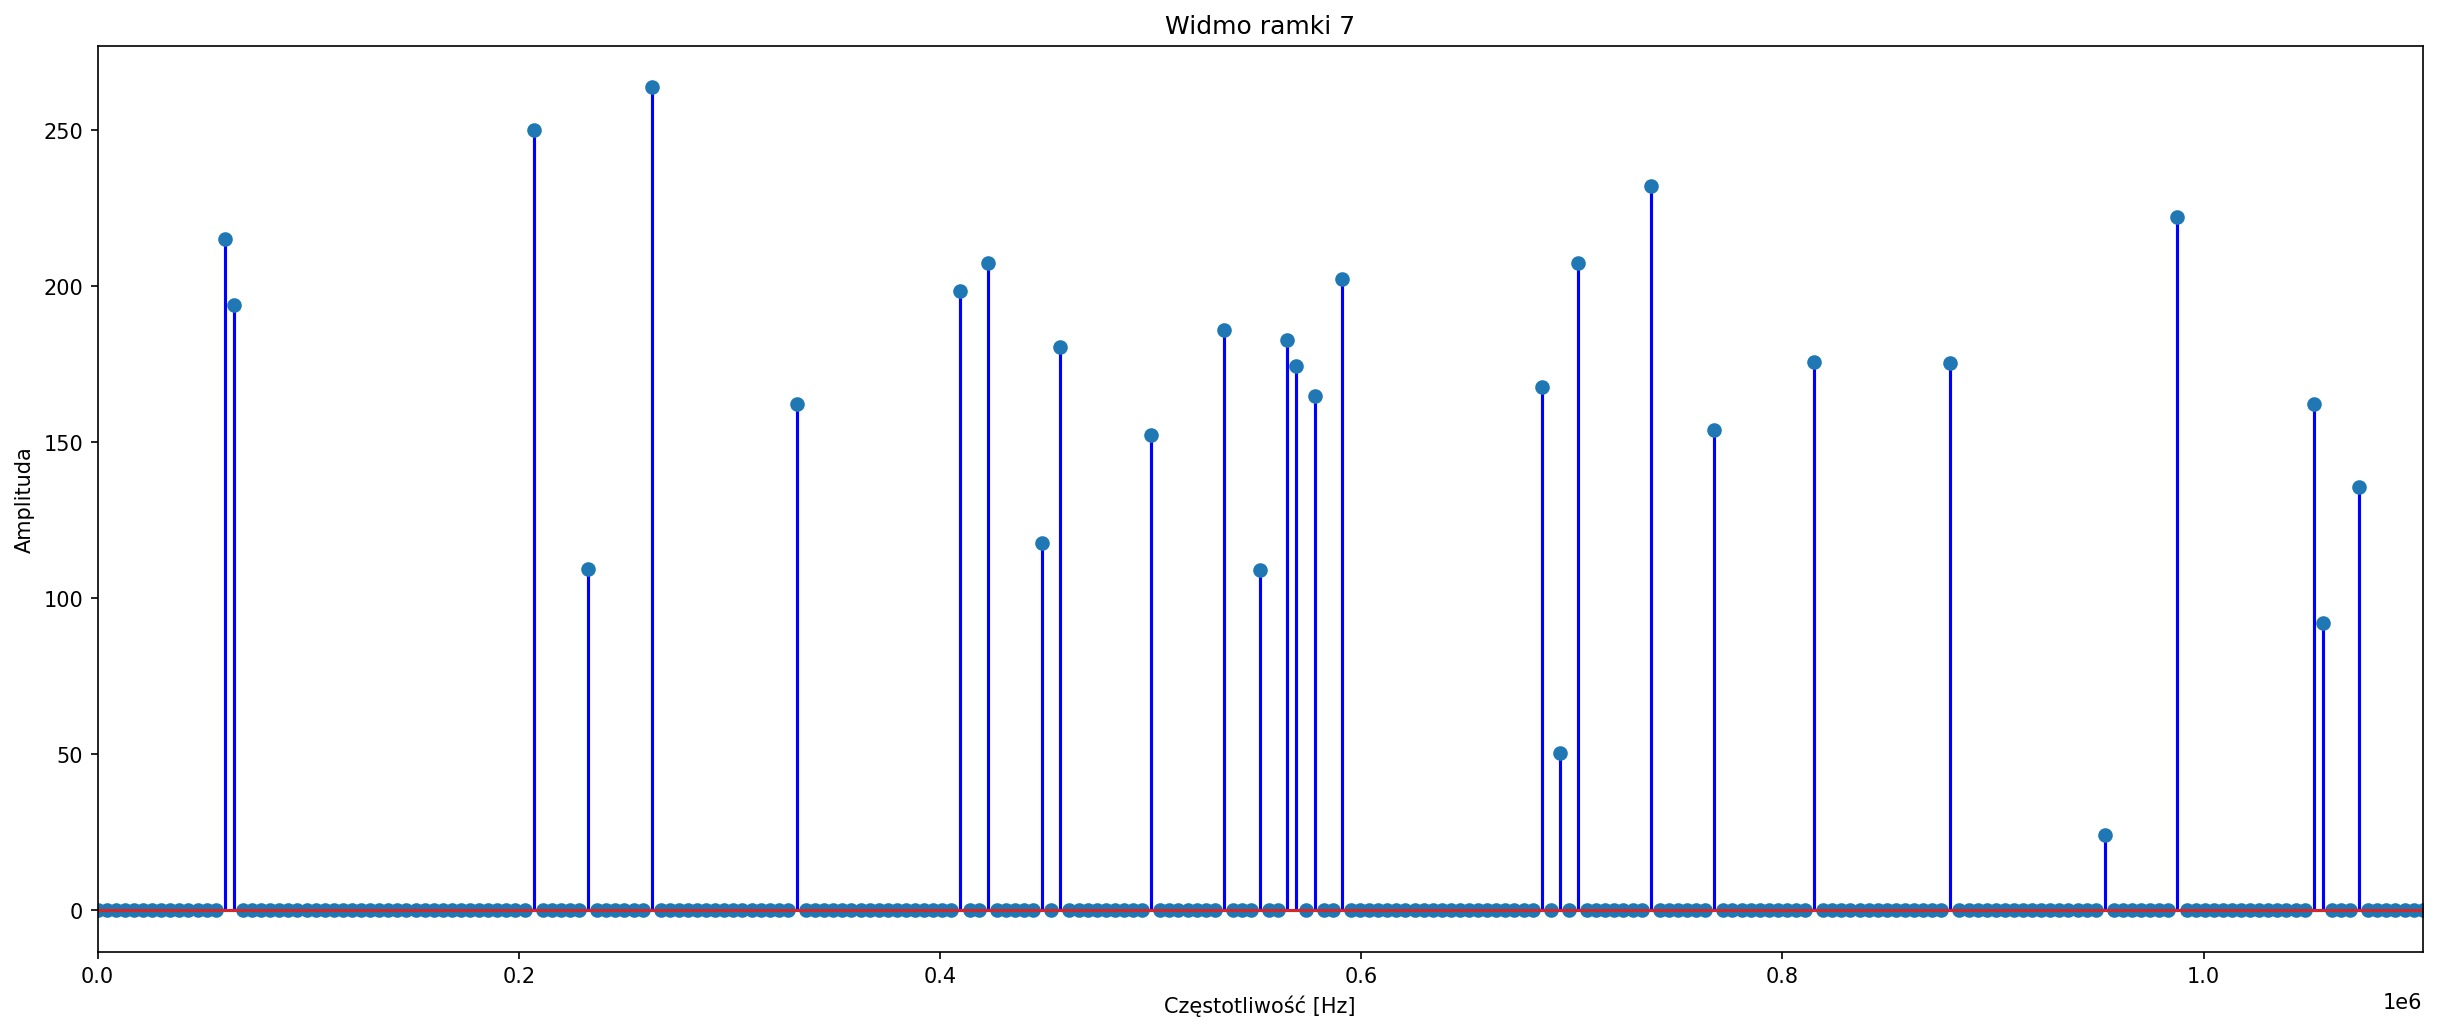

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import gdown


# Pobranie danych
gdown.download("https://drive.google.com/uc?id=1WIq94-IBt3Z1W5_y537PzpuzFrB3Fya2",
               "lab_03.mat", quiet=False)

# Odczytanie pliku lab_03.mat
mat = scipy.io.loadmat('lab_03.mat')

# Należy zmienić 'twoj_numer_indeksu'
index = 407396
a = (index % 16) + 1
tab_name = "x_" + str(a)
x = mat[tab_name]

# Dane
samp_per_frame = 512
prefix_long = 32
number_of_frames = 8
m = 0
fs = 2208000
k_vector = np.arange(0, number_of_frames)
m_vector = np.arange(0, prefix_long)

# Próbki
t = np.arange(0, samp_per_frame)*fs/samp_per_frame

# Podział na ramki
frames = np.reshape(x[:number_of_frames * (prefix_long+samp_per_frame)],
                    (number_of_frames, prefix_long+samp_per_frame))
frames = np.delete(frames, m_vector, 1)

# Wykonanie FFT dla każdej ramki
X = np.zeros((number_of_frames, 512), dtype=np.complex128)
X[k_vector, :] = np.fft.fft(frames[k_vector])

# Wykresy
for i in range(0, number_of_frames):
    title = 'Widmo ramki ' + str(i)
    plt.figure(i, figsize=(20, 8), dpi=150)
    plt.stem(t, np.abs(X[i]), 'b-o', use_line_collection=True)
    plt.title(title)
    plt.xlim(np.array([0, fs/2]))
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Amplituda')


## **5. Analiza rzeczywistego sygnału DAB (opcjonalnie, +1 pkt)**

W rzeczywistym sygnale DAB w przerwie zerowej (*Null Symbol*) może być przesyłana dodatkowa informacja. Jest to suma prostych sygnałów sinusoidalnych. W laboratorium 01 napisałeś program do detekcji próbek, należących do sygnału *Null Symbol*. Teraz dodaj do niego wywoływanie funkcji `fft(...)` na próbkach „zerowych”, wyskaluj otrzymane widma częstotliwościowe i je wyświetl.  Częstotliwość próbkowania *fs=2.048* MHz.

Wykorzystując spostrzeżenia z zadania 5 z Lab02, wyznacz jakie według ciebie sekwencje bitów były przesyłane w sygnałach DAB, analizowanych w zadaniu 4 Lab1. Narysuj na jednym rysunku „konstelację obrotów” wykonywanych na jednej częstotliwości nośnej, czyli wszystkie obroty, które wykonano na wybranej częstotliwości w jednej ramce DAB (rysunek: `Imag()` w funkcji `Real()` kolejnych zespolonych liczb obracających, dla 76 bloków danych; bez linii łączących kolejne wartości kątów obrotu „o” oraz z tymi liniami). Narysuj na jednym rysunku zmienność wartości kąta obrotu dla wszystkich częstotliwości (w poziomie – numer obrotu, w pionie – jego wartość w stopniach; zaznacz wartości kąta symbolem „o”, nie łącz początkowo tych symboli liniami, potem je połącz – otrzymasz wiele linii na jednym rysunku, każda dla innej częstotliwości - czyli tzw. wykres oczkowy)

In [4]:
import math 
import gdown
import scipy.io
import numpy as np
import resampy as re
import plotly.graph_objects as go
from scipy import interpolate


def read_file():
    """
    Funkcja nie przyjmuje żadnych argumentów. Odczytuje ona dane z pliku
    DAB_real_2.048MHz_IQ_float.dat, które następnie zwraca.
    """
    with open('DAB_real_2.048MHz_IQ_float.dat', 'rb') as fid:
        data_array = np.fromfile(fid, np.complex64)

    data_array = np.array(data_array)
    r = np.size(data_array, 0)
    data_array = np.reshape(data_array, (r, 1))
    data_array = np.squeeze(data_array)
    if (fs_file != fs):
        data_array = re.resample(data_array, fs/1e3, fs_file/1e3)

    return data_array


def demodulate_dab_short(x):
    """
    Funkcja przyjmuje sygnał, który nastepnie demoduluje. Zwraca ramki.
    """
    x_matrix = np.zeros((n_symb_per_frame, n_carr_per_symb), dtype=np.complex64)

    for n_symb in range(0, n_symb_per_frame):
        s = x[np.arange(n_symb*n_samp_per_symb, (n_samp_per_prefix + n_fft 
                                                 + n_symb*n_samp_per_symb))]
        s = s[np.arange(n_samp_per_prefix, (n_samp_per_prefix + n_fft))]
        s1 = np.squeeze(s)
        sb = np.fft.fft(s1)
        sb = np.fft.fftshift(sb)
        ss = np.array(sb)
        x_matrix[n_symb, :] = ss[np.arange(n_fft//2 - n_carr_per_symb//2, 
                                           n_fft//2 + n_carr_per_symb//2 )]

    phase_shift_frame = x_matrix[np.arange(1, n_symb_per_frame), :]* \
                        np.conj(x_matrix[np.arange(0, n_symb_per_frame - 1), :])
    return phase_shift_frame


def synchro_time_freq_short(signal):
    """
    Funkcja przyjmuje sygnał, który następnie synchronizuje.
    Zwraca zsynchronizowany sygnał.
    """
    global dab_frame_found_nr, null_1, old_data

    if (len(signal) > 2*n_samp_per_frame):
        x = signal

        # Szukanie Null Symbol
        if dab_frame_found_nr == 0:
            xabs = abs(signal)
            n_samp_per_synchro = n_samp_per_frame + n_samp_per_null
            acc = np.zeros((1, n_samp_per_synchro))
            acc = np.squeeze(acc)
            acc[0] = np.sum(xabs[np.arange(0, n_samp_per_null)])
            for n in range(0, n_samp_per_synchro - 1):
                acc[n + 1] = acc[n] - xabs[n] + xabs[n + n_samp_per_null]
            i1st = np.argmin(acc)
            null_1 = i1st
        else:
            i1st = 0

        adc_ppm_max = 400
        m = round(0.1*adc_ppm_max*n_samp_per_frame/fs)
        i2nd = i1st + n_samp_per_frame - m
        acc = np.zeros((1, 2*m))
        acc = np.squeeze(acc)
        acc[0] = np.sum(abs(x[np.arange(i2nd, i2nd + n_samp_per_null - 1)]))
        for n in range(0, 2*m - 1):
            acc[n + 1] = acc[n] - abs(x[i2nd + n]) + abs(x[i2nd + n 
                                                           + n_samp_per_null])
        i2nd = i2nd + np.argmin(acc)
        dab_frame_found_nr += 1

        # Korekcja ADC
        n_samp_per_frame_adc = i2nd - i1st
        if (n_samp_per_frame_adc != n_samp_per_frame):
            step = n_samp_per_frame_adc/n_samp_per_frame
            f = interpolate.interp1d(np.arange(0, n_samp_per_frame_adc 
                                               + n_samp_per_null - 1),
                                     x[np.arange(i1st, i1st + n_samp_per_frame_adc 
                                                 + n_samp_per_null - 1)],
                                     kind='cubic', fill_value="extrapolate")
            x = f(np.arange(0, n_samp_per_frame_adc + n_samp_per_null - 1, step))

    # Przygotowanie danych wyjściowych
    signal_out = x[np.arange(n_samp_per_null, n_samp_per_null + n_samp_per_frame_symb)]
    old_data = signal[np.arange(i2nd, len(signal))]

    return signal_out


# Pobranie danych
gdown.download("https://drive.google.com/uc?id=1O3JDZAxL0fLdgI_Gw6Hi4Oa1aetR3MTS",
               "DAB_real_2.048MHz_IQ_float.dat", quiet=False)

# Dane
read_size = 500000
fs_file = 2048000.0
fs = 2048000.0
n_symb_per_frame = 76
n_carr_per_symb = 1536
n_samp_per_frame = 196608
n_samp_per_null = 2656
n_samp_per_symb = 2552
n_fft = 2048
n_samp_per_prefix = 504
n_samp_per_frame_symb = n_symb_per_frame*n_samp_per_symb
null_1 = 0
dab_frame_found_nr = 0
n_frames = 100
old_data = []
signal_read = []
fft_frames = []

# Obróbka danych
while dab_frame_found_nr <= n_frames:
    if len(old_data) < read_size:
        signal_read = read_file()
    else:
        signal_read = []

    data = np.concatenate((old_data, signal_read))
    fft_frames = demodulate_dab_short(synchro_time_freq_short(data))

# Wyszukanie wszystkich Null Symbol
signal_to_charts = read_file()
null_start_index = []
null_start_index.append(null_1)
while True:
    if null_start_index[-1] + n_samp_per_frame <= len(signal_to_charts):
        null_start_index.append(null_start_index[-1] + n_samp_per_frame)
    else:
        break

# Wykonanie FFT dla wszystkich Null Symbol
fft_null_tab = []
for i in range(0, len(null_start_index)):
    fft_null_tab.append(np.fft.fft(signal_to_charts[np.arange(null_start_index[i],
                                                              null_start_index[i] 
                                                              + n_samp_per_null)]))

# Wykresy FFT dla wszystkich Null Symbol
for i in range(0, len(fft_null_tab)):
    name = "fig_" + str(i)
    title = 'Widmo Null Symbol ' + str(i)
    t = np.arange(0, len(fft_null_tab[i]))*fs/len(fft_null_tab[i])
    locals()[name] = go.Figure()
    locals()[name].add_trace(go.Scatter(x=t, y=np.abs(fft_null_tab[i])))
    locals()[name].update_layout(title_text=title, title_x=0.5, 
                                 xaxis_range=[0, fs/2])
    locals()[name].update_xaxes(title_text="Częstotliwość [Hz]")
    locals()[name].update_yaxes(title_text="Amplituda")
    locals()[name].show()

# Wykres konstelacji obrotów
k = fft_frames[:, 3]

fig = go.Figure()
fig.add_trace(go.Scatter(x=k.real, y=k.imag, mode="markers"))
fig.update_layout(title_text="Konstelacja obrotów", title_x=0.5)
fig.update_xaxes(title_text="Część rzeczywista")
fig.update_yaxes(title_text="Część urojona")
fig.show()


Downloading...
From: https://drive.google.com/uc?id=1O3JDZAxL0fLdgI_Gw6Hi4Oa1aetR3MTS
To: /content/DAB_real_2.048MHz_IQ_float.dat
100%|██████████| 4.00M/4.00M [00:00<00:00, 144MB/s]
